In [1]:
import awkward as ak
import numpy as np
import uproot as uproot
import matplotlib.pyplot as plt
import mplhep as hep
import vector as vec

from utils import *
from utilsPCA import *
from plotting import *
from efficiency import *

import matplotlib as mpl

mpl.rc('xtick', labelsize=20) 
mpl.rc('ytick', labelsize=20) 
mpl.rc('legend', fontsize=16) 
mpl.rc('axes', labelsize=16, titlesize=20)

#plt.style.use(hep.style.CMS)
%matplotlib inline

In [2]:
C = 29.9792458 #cm/ns

In [3]:
import os
os.listdir('new_root_files')

['.sys.v#.harvest_all.root',
 '.sys.v#.histo_100pi_path.root',
 '.sys.v#.histo_100pi_path_release.root',
 '.sys.v#.histo_4Pi_NEW_1s.root',
 '.sys.v#.histo_4Pi_NEW_2s.root',
 '.sys.v#.histo_Pi_pt100_eta2.root',
 '.sys.v#.histo_Pi_pt100_eta27.root',
 '.sys.v#.histo_Pi_pt100_eta2_newPath.root',
 '.sys.v#.histo_Pi_pt20_eta2.root',
 '.sys.v#.histo_Pi_pt50_eta2.root',
 '.sys.v#.histo_SinglePi_pt20to100_eta17to27_NEW.root',
 '.sys.v#.histo_cone_new.root',
 '.sys.v#.histo_cone_release.root',
 '.sys.v#.histo_no_time.root',
 '.sys.v#.histo_ph_rechits.root',
 '.sys.v#.histo_photon_rechits.root',
 '.sys.v#.histo_pion_rechits.root',
 '.sys.v#.histo_rel.root',
 '.sys.v#.histo_time_2s.root',
 '.sys.v#.histo_time_3s.root',
 'harvest_all.root',
 'histo_100pi_path.root',
 'histo_100pi_path_release.root',
 'histo_4Pi_NEW_1s.root',
 'histo_4Pi_NEW_2s.root',
 'histo_Pi_pt100_eta2.root',
 'histo_Pi_pt100_eta27.root',
 'histo_Pi_pt100_eta2_newPath.root',
 'histo_Pi_pt20_eta2.root',
 'histo_Pi_pt50_eta2.root'

In [18]:
#filename = 'root_files/histo_SinglePi_3LC.root'
name = 'test3'
# filename = '/eos/user/a/aperego/cmssw/track_linking/20888.0_SinglePiPt25Eta1p7_2p7+2026D88/'+name+'.root'
# filename = '/eos/user/a/aperego/SampleProduction/ParticleGunPionPU0_newTimeCompat/histo/'+name+'.root'
filename = 'new_root_files/'+name+'.root'
file = uproot.open(filename)

In [19]:
file.keys()

['ticlDumper;1',
 'ticlDumper/tracksters;1',
 'ticlDumper/clusters;1',
 'ticlDumper/candidates;1',
 'ticlDumper/trackstersMerged;1',
 'ticlDumper/associations;1',
 'ticlDumper/simtrackstersSC;1',
 'ticlDumper/simtrackstersCP;1',
 'ticlDumper/tracks;1',
 'ticlDumper/simTICLCandidate;1']

In [20]:
simtrackstersSC = file["ticlDumper/simtrackstersSC"]
simtrackstersCP = file["ticlDumper/simtrackstersCP"]
tracksters  = file["ticlDumper/tracksters"]
trackstersMerged = file["ticlDumper/trackstersMerged"]
associations = file["ticlDumper/associations"]
tracks = file["ticlDumper/tracks"]
simTICLCandidate = file["ticlDumper/simTICLCandidate"]
TICLCandidate = file["ticlDumper/candidates"]
clusters = file["ticlDumper/clusters"]

In [35]:
candidate_time = TICLCandidate["candidate_time"].array()
print(candidate_time)

[[-476, 0], [-423], [23.2, 0], [-526, 0, ... [-468, 0, 0, 0], [22.2, 0, 0, 0, 0, 0]]


In [21]:
candidate_pdgId = TICLCandidate["candidate_pdgId"].array()
candidate_id_probabilities = TICLCandidate["candidate_id_probabilities"].array()

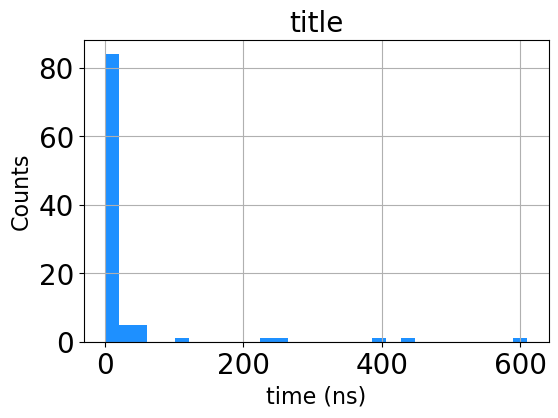

In [22]:
SC_be            = simtrackstersSC["raw_energy"].array()
hist(SC_be)

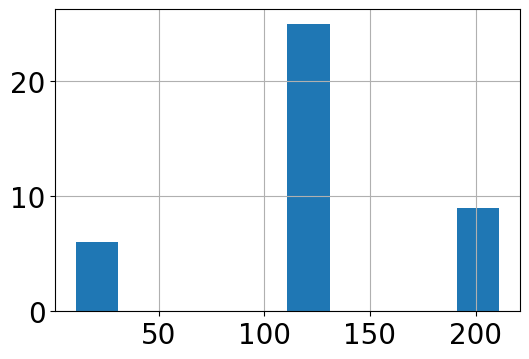

In [23]:
plt.figure(dpi=100)
plt.hist(np.abs(ak.flatten(candidate_pdgId)))
plt.grid()

### delta between track time and trackster time

In [24]:
track_beta = tracks["track_beta"].array()
track_time_mtd = tracks["track_time_mtd"].array()
track_time_mtd_err = tracks["track_time_mtd_err"].array()
track_time_mtd_x = tracks["track_pos_mtd/track_pos_mtd.theVector.theX"].array()
track_time_mtd_y = tracks["track_pos_mtd/track_pos_mtd.theVector.theY"].array()
track_time_mtd_z = tracks["track_pos_mtd/track_pos_mtd.theVector.theZ"].array()
time = trackstersMerged["time"].array()
timeError = trackstersMerged["timeError"].array()
barycenter_x = trackstersMerged["barycenter_x"].array()
barycenter_y = trackstersMerged["barycenter_y"].array()
barycenter_z = trackstersMerged["barycenter_z"].array()

In [25]:
# time_3d = tracksters["time"].array()
# timeError_3d = tracksters["timeError"].array()
# barycenter_x_3d = tracksters["barycenter_x"].array()
# barycenter_y_3d = tracksters["barycenter_y"].array()
# barycenter_z_3d = tracksters["barycenter_z"].array()

In [26]:
tracksters_in_candidate = TICLCandidate["tracksters_in_candidate"].array()
track_in_candidate      = TICLCandidate["track_in_candidate"].array()

In [27]:
track_id = tracks["track_id"].array()
track_pt = tracks["track_pt"].array()
track_missing_outer_hits = tracks["track_missing_outer_hits"].array()
track_quality = tracks["track_quality"].array()
# recoToSim_score = associations["Mergetstracksters_recoToSim_SC_score"].array()

In [28]:
def distance(a,b):
    return np.sqrt((a[0]-b[0])**2+(a[1]-b[1])**2+(a[2]-b[2])**2)

In [29]:
res = []
z_bary = []
for ev in range(len(track_in_candidate)):
    for ts, tk in enumerate(track_in_candidate[ev]):
        # ts = tracksterMerged index
        # tk = track index != pos in the collection
        # id_in_trkColl = pos in the collection
        if tk == -1 or len(tracksters_in_candidate[ev][ts])==0:
            continue # no reco track associated to trackster or empty trackster
        try:
            id_in_trkColl = np.where(track_id[ev] == tk)[0][0]
        except:
            # tsos was not valid
            continue
        if track_pt[ev][id_in_trkColl] < 1 or track_missing_outer_hits[ev][id_in_trkColl] > 5 or not track_quality[ev][id_in_trkColl]: # GeV
            continue 

#         ass = recoToSim_score[ev][ts]
#         s_min = np.argmin(ass)
#         if recoToSim_score[ev][ts][s_min]>0.35:
#             continue
            
        beta = track_beta[ev][id_in_trkColl]
        mtdTime = track_time_mtd[ev][id_in_trkColl]
        mtdTimeErr = track_time_mtd_err[ev][id_in_trkColl]
        mtdPos = [track_time_mtd_x[ev][id_in_trkColl], track_time_mtd_y[ev][id_in_trkColl], track_time_mtd_z[ev][id_in_trkColl]]
        tsTime = time[ev][ts]
        tsTimeErr = timeError[ev][ts]
        print(tsTime, tsTimeErr)
        tsPos = [barycenter_x[ev][ts], barycenter_y[ev][ts], barycenter_z[ev][ts]]

        if mtdTimeErr != -1 and tsTimeErr != -1:
            if tsTimeErr < 0.02:
                tsTimeErr = 0.02
            res.append((distance(mtdPos, tsPos)/(beta*29.9792458) - (tsTime-mtdTime))) #/ (tsTimeErr**2+mtdTimeErr**2)**0.5)
            z_bary.append(abs(barycenter_z[ev][ts]))

12.417949676513672 0.01265159621834755
11.602084159851074 0.004481396172195673
11.141456604003906 0.005395764019340277
14.174983978271484 0.007675689645111561
-99.0 -1.0
11.653331756591797 0.013743424788117409
-99.0 -1.0
13.03213119506836 0.02904467284679413
10.824142456054688 0.005835217423737049


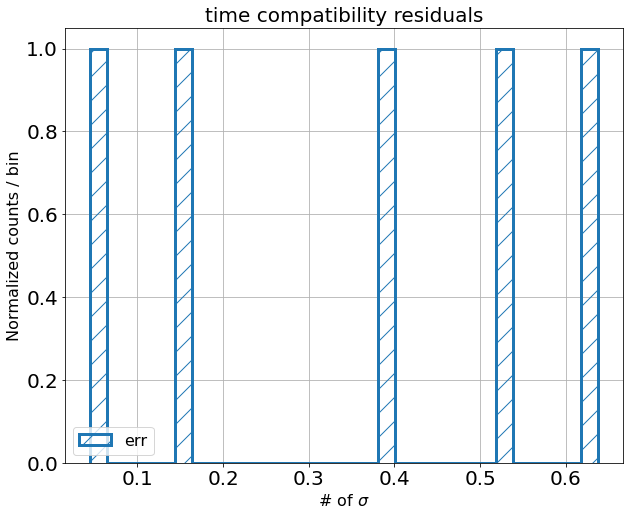

In [30]:
plt.figure(figsize=(10,8))
#plt.hist(res,   bins=60, histtype="step", range=(-0.5,0.5), linewidth=3, label="simhits", hatch="/")
# plt.hist(res2,   bins=40, density=True, histtype="step", range=(-0.5,0.5), linewidth=3, label="rechits", hatch="/")
plt.hist(np.array(res),   bins=30, histtype="step", linewidth=3, label="err", hatch="/")
# # plt.hist(res5,  bins=30, density=True, range=(-6,6), histtype="step", linewidth=3, label="err*5")
# plt.hist(res10, bins=30, density=True, range=(-6,6), histtype="step", linewidth=3, label="err*2")
# # plt.hist(res15, bins=30, density=True, range=(-6,6), histtype="step", linewidth=3, label="err*3")
# plt.hist(res20, bins=30, density=True, range=(-6,6), histtype="step", linewidth=3, label="err*4")
# plt.axvline(3, c="r")
# plt.axvline(-3, c="r")
plt.grid()
plt.title("time compatibility residuals")
plt.xlabel("# of $\sigma$")
plt.ylabel("Normalized counts / bin")
plt.legend()
plt.show()

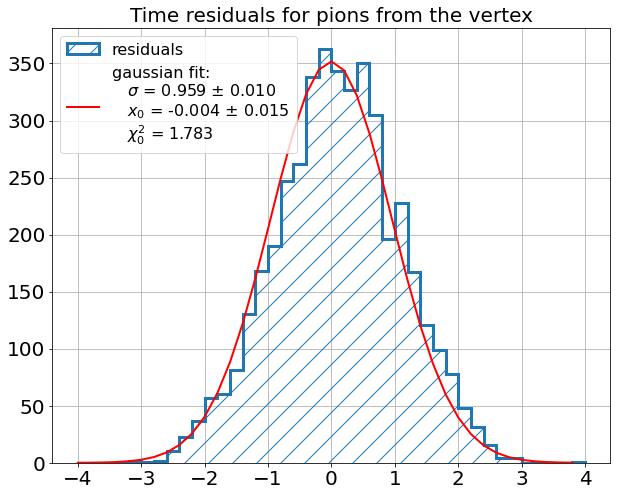

In [16]:
from isolation import *
LIM=4
bins=40
hist, nbins = np.histogram(res, bins=bins, range=(-LIM,LIM))
errors = [np.sqrt(oh+1) for oh in hist]
init_parameters = [40,0,0.04]
cost_func = cost.LeastSquares(nbins[:-1], hist, errors, model)
min_obj = Minuit(cost_func, *init_parameters)
result = min_obj.migrad()
chi2 = min_obj.fval/(len(nbins[:-1])-3)
result
plt.figure(figsize=(10,8))
plt.hist(res,   bins=bins, histtype="step", linewidth=3, label="residuals", hatch="/", range=(-LIM,LIM))
y = model(nbins[:-1], *result.values)
plt.plot(nbins[:-1], y, label=f'gaussian fit:\n   $\sigma$ = {result.values[2]:.3f} $\pm$ {result.errors[2]:.3f}\n   $x_0$ = {result.values[1]:.3f} $\pm$ {result.errors[1]:.3f} \n   $\chi^2_0$ = {chi2:.3f}', 
         color="red", linewidth=2)
plt.legend()
plt.title("Time residuals for pions from the vertex")
plt.grid()

In [19]:
from isolation import *
LIM=4
bins=40
plt.figure(figsize=(10,8))
res, chi2 = gauss_fit_and_plot(res, init_parms=[40,0,0.04], label="reco", bins=np.linspace(-LIM, LIM, bins))
plt.title("Time residuals for pions from the vertex")
plt.xlabel("# sigma")
plt.ylabel("Counts / bin")
plt.legend(fontsize=16)
plt.show()

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (37,) and arg 1 with shape (38,).

<Figure size 720x576 with 0 Axes>

### with clue3D tracksters

In [112]:
res = []
z_bary = []
for ev in range(len(track_in_candidate)):
    for ts, tk in enumerate(track_in_candidate[ev]):
        # ts = tracksterMerged index
        # tk = track index != pos in the collection
        # id_in_trkColl = pos in the collection
        if tk == -1 or len(tracksters_in_candidate[ev][ts])==0:
            continue # no reco track associated to trackster or empty trackster
        try:
            id_in_trkColl = np.where(track_id[ev] == tk)[0][0]
        except:
            # tsos was not valid
            continue
        if track_pt[ev][id_in_trkColl] < 1 or track_missing_outer_hits[ev][id_in_trkColl] > 5 or not track_quality[ev][id_in_trkColl]: # GeV
            continue 

#         ass = recoToSim_score[ev][ts]
#         s_min = np.argmin(ass)
#         if recoToSim_score[ev][ts][s_min]>0.35:
#             continue
            
        beta = track_beta[ev][id_in_trkColl]
        mtdTime = track_time_mtd[ev][id_in_trkColl]
        mtdTimeErr = track_time_mtd_err[ev][id_in_trkColl]
        mtdPos = [track_time_mtd_x[ev][id_in_trkColl], track_time_mtd_y[ev][id_in_trkColl], track_time_mtd_z[ev][id_in_trkColl]-2]
        for ts_3d in tracksters_in_candidate[ev][ts]:
            tsTime = time_3d[ev][ts_3d]
            tsTimeErr = timeError_3d[ev][ts_3d]
            tsPos = [barycenter_x_3d[ev][ts_3d], barycenter_y_3d[ev][ts_3d], barycenter_z_3d[ev][ts_3d]]

            if mtdTimeErr != -1 and tsTimeErr != -1:
                res.append((distance(mtdPos, tsPos)/(beta*29.9792458) - (tsTime-mtdTime))) #/ (np.sqrt(2)*mtdTimeErr**2))
                z_bary.append(barycenter_z[ev][ts])

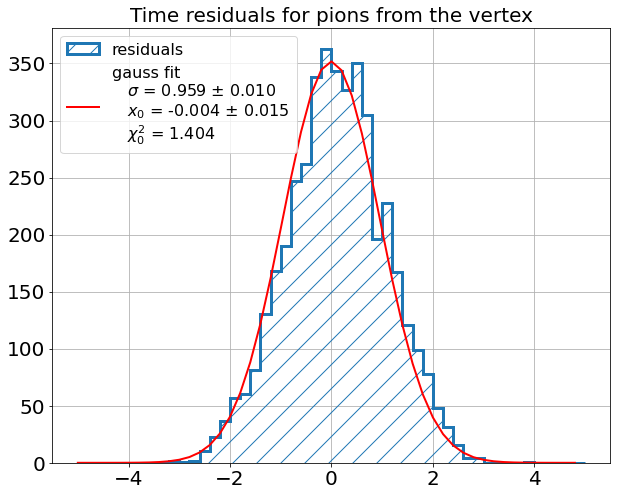

In [27]:
from isolation import *
LIM=5
bins=50
z_bary = np.array(z_bary)
hist, nbins = np.histogram(np.array(res)[z_bary>0], bins=bins, range=(-LIM,LIM))
errors = [np.sqrt(oh+1) for oh in hist]
init_parameters = [100,0,1]
cost_func = cost.LeastSquares(nbins[:-1], hist, errors, model)
min_obj = Minuit(cost_func, *init_parameters)
result = min_obj.migrad()
chi2 = min_obj.fval/(len(nbins[:-1])-3)
result
plt.figure(figsize=(10,8))
plt.hist(np.array(res)[z_bary>0],   bins=bins, histtype="step", linewidth=3, label="residuals", hatch="/", range=(-LIM,LIM))
y = model(nbins[:-1], *result.values)
plt.plot(nbins[:-1], y, label=f'gauss fit\n   $\sigma$ = {result.values[2]:.3f} $\pm$ {result.errors[2]:.3f}\n   $x_0$ = {result.values[1]:.3f} $\pm$ {result.errors[1]:.3f} \n   $\chi^2_0$ = {chi2:.3f}', 
         color="red", linewidth=2)
plt.legend()
plt.title("Time residuals for pions from the vertex")
plt.grid()

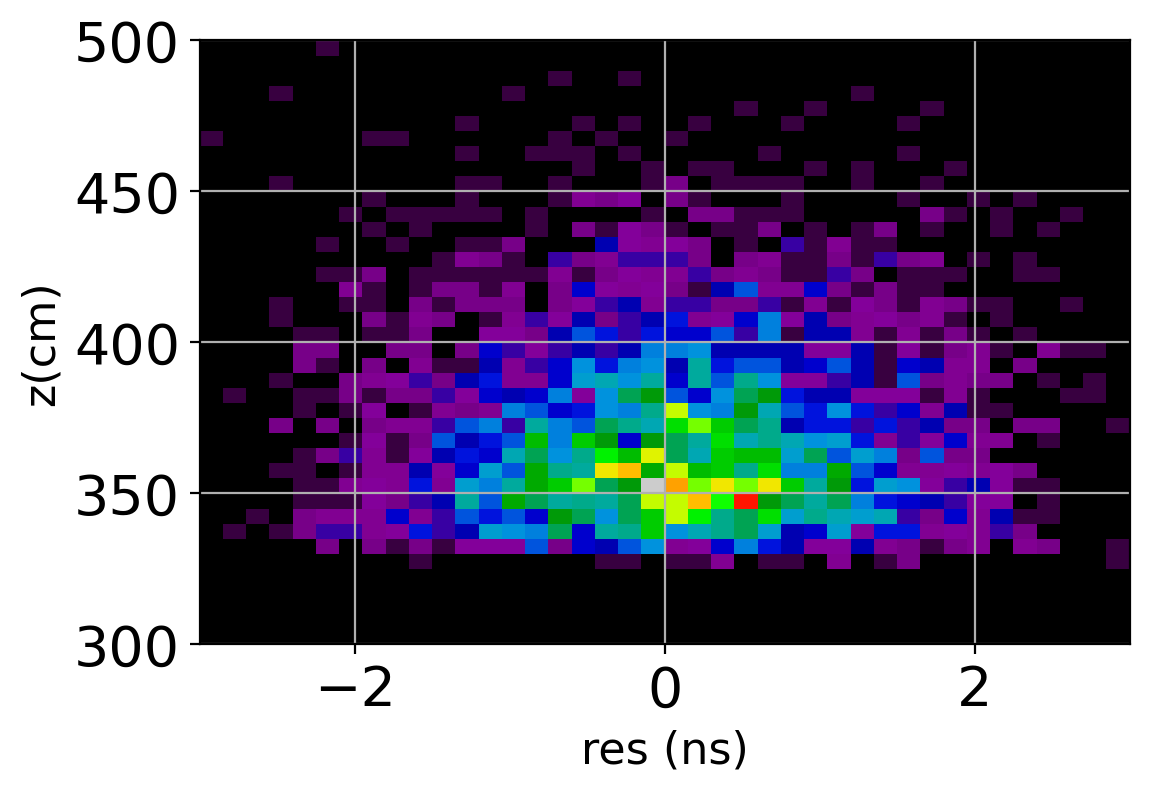

In [29]:
plt.figure(dpi=200)
plt.xlabel("res (ns)")
plt.ylabel("z(cm)")
plt.hist2d(res, z_bary, range=((-3,3),(300, 500)), bins=40, cmap="nipy_spectral")
plt.grid()
plt.show()

### Layer clusters time resolution vs energy

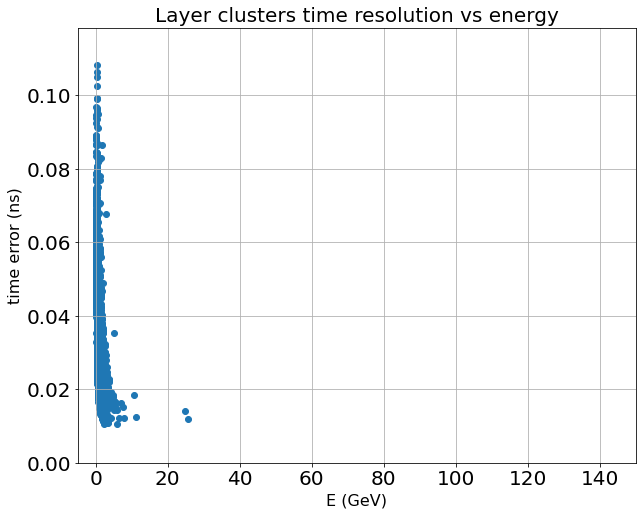

In [16]:
LCenergy = clusters["energy"].array()
LCtimeErr = clusters["cluster_timeErr"].array()
plt.figure(figsize=(10,8))
plt.scatter(ak.flatten(LCenergy)[:100000], ak.flatten(LCtimeErr)[:100000])
plt.ylim(0,max(ak.flatten(LCtimeErr)[:100000])+0.01)
plt.grid()
# plt.axvline(10, c="red")
plt.title("Layer clusters time resolution vs energy")
plt.xlabel("E (GeV)")
plt.ylabel("time error (ns)")
plt.xlim(-5,150)
plt.show()

In [68]:
trackstersMerged_CALO_time   = trackstersMerged["time"].array()
trackstersMerged_CALO_err = trackstersMerged["timeError"].array()
CP_CALO_time     = simtrackstersCP["time"].array()
SC_CALO_time     = simtrackstersSC["time"].array()

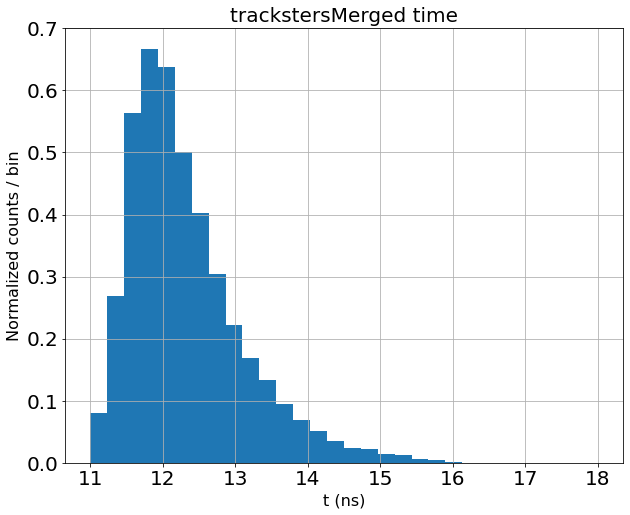

In [69]:
plt.figure(figsize=(10,8))
plt.hist(ak.flatten(trackstersMerged_CALO_time[trackstersMerged_CALO_time>-90]), bins=30, density=True, range=(11,18))
plt.grid()
plt.title("trackstersMerged time")
plt.xlabel("t (ns)")
plt.ylabel("Normalized counts / bin")
plt.show()

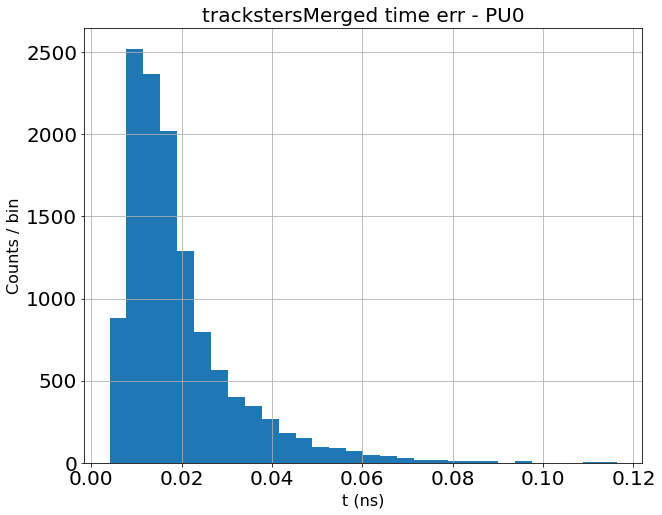

In [70]:
plt.figure(figsize=(10,8))
plt.hist(ak.flatten(trackstersMerged_CALO_err[trackstersMerged_CALO_time>-90]), bins=30)
plt.grid()
plt.title("trackstersMerged time err - PU0")
plt.xlabel("t (ns)")
plt.ylabel("Counts / bin")
plt.show()

In [9]:
track_pt = tracks["track_pt"].array()
# track_missing_outer_hits = tracks["track_missing_outer_hits"].array()
# track_quality = tracks["track_quality"].array()

In [10]:
track_id = tracks["track_id"].array()
track_boundaryX = simtrackstersSC["track_boundaryX"].array()
track_boundaryY = simtrackstersSC["track_boundaryY"].array()
track_boundaryZ = simtrackstersSC["track_boundaryZ"].array()

In [79]:
cluster_number_of_hits = clusters["cluster_number_of_hits"].array()
cluster_layer_id = clusters["cluster_layer_id"].array()
cluster_type = clusters["cluster_type"].array()

In [11]:
tracksters_in_candidate = TICLCandidate["tracksters_in_candidate"].array()
track_in_candidate      = TICLCandidate["track_in_candidate"].array()

In [12]:
recoToSim_en    = associations["Mergetstracksters_recoToSim_SC_sharedE"].array()
recoToSim_score = associations["Mergetstracksters_recoToSim_SC_score"].array()
recoToSim_index = associations["Mergetstracksters_recoToSim_SC"].array()

simToReco_en    = associations["Mergetstracksters_simToReco_SC_sharedE"].array()
simToReco_score = associations["Mergetstracksters_simToReco_SC_score"].array()
simToReco_index = associations["Mergetstracksters_simToReco_SC"].array()

In [13]:
tracksters_vx        = tracksters["vertices_x"].array()
tracksters_vy        = tracksters["vertices_y"].array()
tracksters_vz        = tracksters["vertices_z"].array()
tracksters_ve        = tracksters["vertices_energy"].array()
tracksters_vi        = tracksters["vertices_indexes"].array()
tracksters_vt        = tracksters["vertices_time"].array()
tracksters_vtErr     = tracksters["vertices_timeErr"].array()
tracksters_vm        = tracksters["vertices_multiplicity"].array()
tracksters_bx        = tracksters["barycenter_x"].array()
tracksters_by        = tracksters["barycenter_y"].array()
tracksters_bz        = tracksters["barycenter_z"].array()
tracksters_be        = tracksters["raw_energy"].array()
tracksters_CALO_time = tracksters["time"].array()
tracksters_CALO_err  = tracksters["timeError"].array()
tracksters_EVx       = tracksters["eVector0_x"].array()
tracksters_EVy       = tracksters["eVector0_y"].array()
tracksters_EVz       = tracksters["eVector0_z"].array()

In [83]:
trackstersMerged_vx          = trackstersMerged["vertices_x"].array()
trackstersMerged_vy          = trackstersMerged["vertices_y"].array()
trackstersMerged_vz          = trackstersMerged["vertices_z"].array()
trackstersMerged_ve          = trackstersMerged["vertices_energy"].array()
trackstersMerged_vi          = trackstersMerged["vertices_indexes"].array()
trackstersMerged_vt          = trackstersMerged["vertices_time"].array()
trackstersMerged_vtErr       = trackstersMerged["vertices_timeErr"].array()
trackstersMerged_vm          = trackstersMerged["vertices_multiplicity"].array()
trackstersMerged_bx          = trackstersMerged["barycenter_x"].array()
trackstersMerged_by          = trackstersMerged["barycenter_y"].array()
trackstersMerged_bz          = trackstersMerged["barycenter_z"].array()
trackstersMerged_be          = trackstersMerged["raw_energy"].array()
trackstersMerged_CALO_time   = trackstersMerged["time"].array()
trackstersMerged_CALO_err    = trackstersMerged["timeError"].array()
trackstersMerged_EVx         = trackstersMerged["eVector0_x"].array()
trackstersMerged_EVy         = trackstersMerged["eVector0_y"].array()
trackstersMerged_EVz         = trackstersMerged["eVector0_z"].array()
# trackstersMerged_MTD_time    = trackstersMerged["tMtd"].array()
# trackstersMerged_MTD_err     = trackstersMerged["tMtdError"].array()
# trackstersMerged_MTD_speed   = trackstersMerged["speedMtd"].array()
# trackstersMerged_MTD_posX    = trackstersMerged["tMtdPos/tMtdPos.theVector.theX"].array()
# trackstersMerged_MTD_posY    = trackstersMerged["tMtdPos/tMtdPos.theVector.theY"].array()
# trackstersMerged_MTD_posZ    = trackstersMerged["tMtdPos/tMtdPos.theVector.theZ"].array()

In [14]:
SC_boundx        = simtrackstersSC["boundaryX"].array()
SC_boundy        = simtrackstersSC["boundaryY"].array()
SC_boundz        = simtrackstersSC["boundaryZ"].array()
SC_vx            = simtrackstersSC["vertices_x"].array()
SC_vy            = simtrackstersSC["vertices_y"].array()
SC_vz            = simtrackstersSC["vertices_z"].array()
SC_ve            = simtrackstersSC["vertices_energy"].array()
SC_vi            = simtrackstersSC["vertices_indexes"].array()
SC_vt            = simtrackstersSC["vertices_time"].array()
SC_vtErr         = simtrackstersSC["vertices_timeErr"].array()
SC_vm            = simtrackstersSC["vertices_multiplicity"].array()
SC_bx            = simtrackstersSC["barycenter_x"].array()
SC_by            = simtrackstersSC["barycenter_y"].array()
SC_bz            = simtrackstersSC["barycenter_z"].array()
SC_be            = simtrackstersSC["raw_energy"].array()
SC_CALO_time     = simtrackstersSC["time"].array()
SC_CALO_err      = simtrackstersSC["timeError"].array()
# SC_MTD_time      = simtrackstersSC["tMtd"].array()
# SC_MTD_err       = simtrackstersSC["tMtdError"].array()
# SC_MTD_simTime   = simtrackstersSC["tMtdSim"].array()
# SC_MTD_speed     = simtrackstersSC["speedMtd"].array()
# SC_MTD_simPosX   = simtrackstersSC["tMtdPos/tMtdPos.theVector.theX"].array()
# SC_MTD_simPosY   = simtrackstersSC["tMtdPos/tMtdPos.theVector.theY"].array()
# SC_MTD_simPosZ   = simtrackstersSC["tMtdPos/tMtdPos.theVector.theZ"].array()
SC_trackIdx      = simtrackstersSC["trackIdx"].array()

In [56]:
CP_boundx        = simtrackstersCP["boundaryX"].array()
CP_boundy        = simtrackstersCP["boundaryY"].array()
CP_boundz        = simtrackstersCP["boundaryZ"].array()
CP_vx            = simtrackstersCP["vertices_x"].array()
CP_vy            = simtrackstersCP["vertices_y"].array()
CP_vz            = simtrackstersCP["vertices_z"].array()
CP_ve            = simtrackstersCP["vertices_energy"].array()
CP_vi            = simtrackstersCP["vertices_indexes"].array()
CP_vt            = simtrackstersCP["vertices_time"].array()
CP_vtErr         = simtrackstersCP["vertices_timeErr"].array()
CP_vm            = simtrackstersCP["vertices_multiplicity"].array()
CP_bx            = simtrackstersCP["barycenter_x"].array()
CP_by            = simtrackstersCP["barycenter_y"].array()
CP_bz            = simtrackstersCP["barycenter_z"].array()
CP_be            = simtrackstersCP["raw_energy"].array()
CP_CALO_time     = simtrackstersCP["time"].array()
CP_CALO_err      = simtrackstersCP["timeError"].array()
# CP_MTD_time      = simtrackstersCP["tMtd"].array()
# CP_MTD_err       = simtrackstersCP["tMtdError"].array()
# CP_MTD_simTime   = simtrackstersCP["tMtdSim"].array()
# CP_MTD_speed     = simtrackstersCP["speedMtd"].array()
# CP_MTD_simPosX   = simtrackstersCP["tMtdPos/tMtdPos.theVector.theX"].array()
# CP_MTD_simPosY   = simtrackstersCP["tMtdPos/tMtdPos.theVector.theY"].array()
# CP_MTD_simPosZ   = simtrackstersCP["tMtdPos/tMtdPos.theVector.theZ"].array()
CP_trackIdx      = simtrackstersCP["trackIdx"].array()

In [15]:
NEVENTS = len(SC_vx)
print(f'There are {NEVENTS} events in the file')

There are 1000 events in the file


In [ ]:
#events without mtd
no_mtd = 0
for i, mtd_times in enumerate(trackstersMerged_MTD_time):
    #print(mtd_times)
    t = mtd_times[mtd_times>0]
    if len(t) == 0:
        no_mtd += 1
print(no_mtd)

## track association

In [21]:
track_pt = tracks["track_pt"].array()
track_missing_outer_hits = tracks["track_missing_outer_hits"].array()
track_quality = tracks["track_quality"].array()
track_id = tracks["track_id"].array()

tracksters_in_candidate = TICLCandidate["tracksters_in_candidate"].array()
track_in_candidate      = TICLCandidate["track_in_candidate"].array()

#recoToSim_en    = associations["Mergetstracksters_recoToSim_SC_sharedE"].array()
recoToSim_score = associations["Mergetstracksters_recoToSim_SC_score"].array()
recoToSim_index = associations["Mergetstracksters_recoToSim_SC"].array()

# #simToReco_en    = associations["Mergetstracksters_simToReco_SC_sharedE"].array()
# simToReco_score = associations["Mergetstracksters_simToReco_SC_score"].array()
# simToReco_index = associations["Mergetstracksters_simToReco_SC"].array()

SC_be            = simtrackstersSC["raw_energy"].array()
SC_trackIdx      = simtrackstersSC["trackIdx"].array()

KeyboardInterrupt: 

In [ ]:
def find_track_in_candidate(j, TICLtracks):
#     print(j ,TICLtracks)
    for i, trk in enumerate(TICLtracks):
        try:
            j = np.where(trk==j)[0][0]
            return i
        except: 
            continue
    return -1 #should not get here

In [ ]:
# efficiency using reco to sim
# loop on STs' tracks
# take the candidate associated to the track (skip if candidate empty)
# check (using energy associator) the ST associated to the tracksters in the candidate
all_energy = []
empty_but_reco_is_there = []
empty = []
reco_but_not_sim = [] 
wrong_energy = [] 
ok_energy = []
tracce_ok_list = []
# tracks_not_linked = []

ok=0
den=0
for ev in range(len(SC_trackIdx)): 
#     if len(SC_trackIdx[ev])>2:
#         continue
    tracce_list = []
    for s, tkIdx in enumerate(SC_trackIdx[ev]):
        if tkIdx == -1:
            continue # no reco track associated to simTrackster
        try:
#            print(track_id[ev], tkIdx)
            id_in_trkColl = np.where(track_id[ev] == tkIdx)[0][0]
        except:
            # tsos was not valid
            continue
        if track_pt[ev][id_in_trkColl] < 1 or track_missing_outer_hits[ev][id_in_trkColl] > 5 or not track_quality[ev][id_in_trkColl]: # GeV
#             tracks_not_linked.append(SC_be[ev][s])  
            continue
            
        all_energy.append(SC_be[ev][s])  
        den+=1    

        cand_track = find_track_in_candidate(tkIdx, track_in_candidate[ev])
        cand = tracksters_in_candidate[ev][cand_track]
        if len(cand) == 0:
            # vedere se c'è un reco associato al sim simtoreco < 0.35
            r2s_score = recoToSim_score[ev]
            match = 0
            for reco in r2s_score:
                if reco[s] < 0.35:
                    match=1
                    break
            if match==1:
                empty_but_reco_is_there.append(SC_be[ev][s])
            else:
                empty.append(SC_be[ev][s])  
            continue # empty candidate -> only track in candidate
#         if len(cand) == 0:
#             # vedere se c'è un reco associato al sim simtoreco < 0.35
#             s2r_score = simToReco_score[ev][s]
#             if min(s2r_score) < 0.35:
#                 empty_but_reco_is_there.append(SC_be[ev][s])
# #                 if SC_be[ev][s] > 1000:
# #                     print(ev, SC_be[ev][s])
#             else:
#                 empty.append(SC_be[ev][s])  
#             continue # empty candidate -> only track in candidate

        #for r, tks in enumerate(cand):
        ass = recoToSim_score[ev][cand_track]
        s_min = np.argmin(ass)
        if recoToSim_score[ev][cand_track][s_min]>0.35:
#             print("reco not associated to sim")
            reco_but_not_sim.append(SC_be[ev][s])
            continue
        s_assoc = recoToSim_index[ev][cand_track][s_min]
        if s==s_assoc:
            ok += 1
            ok_energy.append(SC_be[ev][s])
#             print(ev, tkIdx)
            tracce_list.append(tkIdx)
        else:
            wrong_energy.append(SC_be[ev][s])
    tracce_ok_list.append(tracce_list)

In [ ]:
eff = ok/den
print(eff)
# it's so high bc there is no cut on the association

In [ ]:
# import csv

# with open("tracce_ok_list.csv", "w") as f:
#     wr = csv.writer(f)
#     wr.writerows(tracce_ok_list)

In [ ]:
np.savetxt("4Pi_close_NEW_empty_but_reco_is_there.txt", empty_but_reco_is_there)
np.savetxt("4Pi_close_NEW_empty.txt", empty)
np.savetxt("4Pi_close_NEW_reco_but_not_sim.txt", reco_but_not_sim)
np.savetxt("4Pi_close_NEW_wrong_energy.txt", wrong_energy)
np.savetxt("4Pi_close_NEW_ok_energy.txt", ok_energy)

In [ ]:
plt.figure(figsize=(12,8))
#plt.hist(all_energy, label="all", color="red", alpha=0.5, bins=30, range=(min(min(all_energy), min(wrong_energy)), max(max(all_energy), max(wrong_energy))), stacked=False)
# plt.hist( label="not matched", color="orange", bins=30, range=(min(min(all_energy), min(wrong_energy)), max(max(all_energy), max(wrong_energy))), stacked=True)
# plt.hist(wrong_energy, label="wrong match", color="blue", histtype="step", bins=30, range=(min(min(all_energy), min(wrong_energy)), max(max(all_energy), max(wrong_energy))), stacked=True)

plt.hist([empty_but_reco_is_there, empty, reco_but_not_sim, wrong_energy, ok_energy],
         label=["empty candidate, >=1 reco assoc to sim", "empty candidate, no reco assoc to sim", "recoTrackster not matched with simTrackster", "wrong match with the track", "correct match with the track"], 
         color=["red","midnightblue", "yellow", "limegreen", "dodgerblue"], 
         bins=20, 
#          range=(20, max(all_energy)), 
         range=(min(all_energy), max(all_energy)), 
         stacked=True)

plt.grid()
plt.legend()
plt.title('Links track-trackster as a function of the\nenergy distribution of simTracksters from SC\nwith recoTrack (pT> 1 Gev) ('+ name + ')')
plt.xlabel('E (GeV)', size=18)
plt.ylabel('Counts / bin', size=18)
plt.show()

In [56]:
def error_division(num, den):
    return num/den * (1/(num+1) + 1/(den+1))**0.5

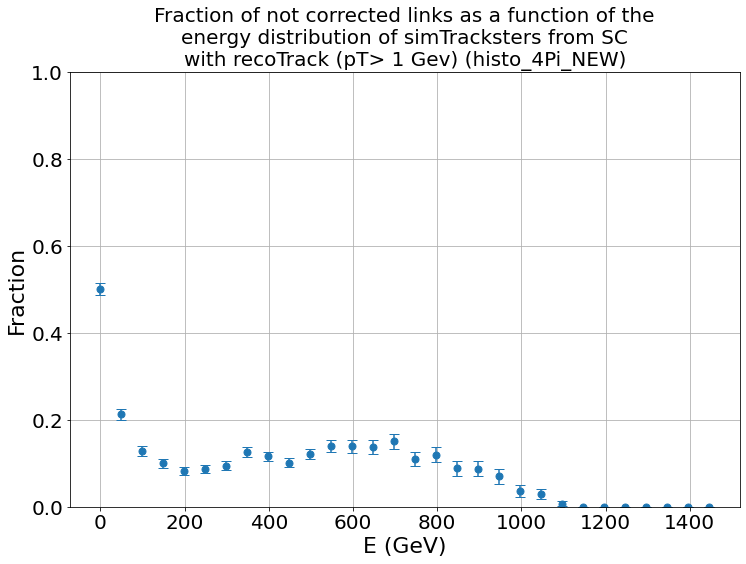

In [57]:
#plt.hist(all_energy, label="all", color="red", alpha=0.5, bins=30, range=(min(min(all_energy), min(wrong_energy)), max(max(all_energy), max(wrong_energy))), stacked=False)
# plt.hist( label="not matched", color="orange", bins=30, range=(min(min(all_energy), min(wrong_energy)), max(max(all_energy), max(wrong_energy))), stacked=True)
# plt.hist(wrong_energy, label="wrong match", color="blue", histtype="step", bins=30, range=(min(min(all_energy), min(wrong_energy)), max(max(all_energy), max(wrong_energy))), stacked=True)

hist_0, bins = np.histogram(ok_energy+empty_but_reco_is_there+empty+reco_but_not_sim+wrong_energy, bins=30)
hist_1, _    = np.histogram(empty_but_reco_is_there+empty+reco_but_not_sim+wrong_energy, bins=bins)

plt.figure(figsize=(12,8))
#plt.hist(all_energy, label="all", color="red", alpha=0.5, bins=30, range=(min(min(all_energy), min(wrong_energy)), max(max(all_energy), max(wrong_energy))), stacked=False)
# plt.hist( label="not matched", color="orange", bins=30, range=(min(min(all_energy), min(wrong_energy)), max(max(all_energy), max(wrong_energy))), stacked=True)
# plt.hist(wrong_energy, label="wrong match", color="blue", histtype="step", bins=30, range=(min(min(all_energy), min(wrong_energy)), max(max(all_energy), max(wrong_energy))), stacked=True)

plt.errorbar(bins[:-1], hist_1/hist_0, error_division(hist_1, hist_0), marker='o', markersize=7, linestyle='none', capsize=5)

plt.grid()
plt.title('Fraction of not corrected links as a function of the\nenergy distribution of simTracksters from SC\nwith recoTrack (pT> 1 Gev) ('+ name + ')')
plt.xlabel('E (GeV)', size=22)
plt.ylabel('Fraction', size=22)
plt.ylim(0,1)
plt.show()

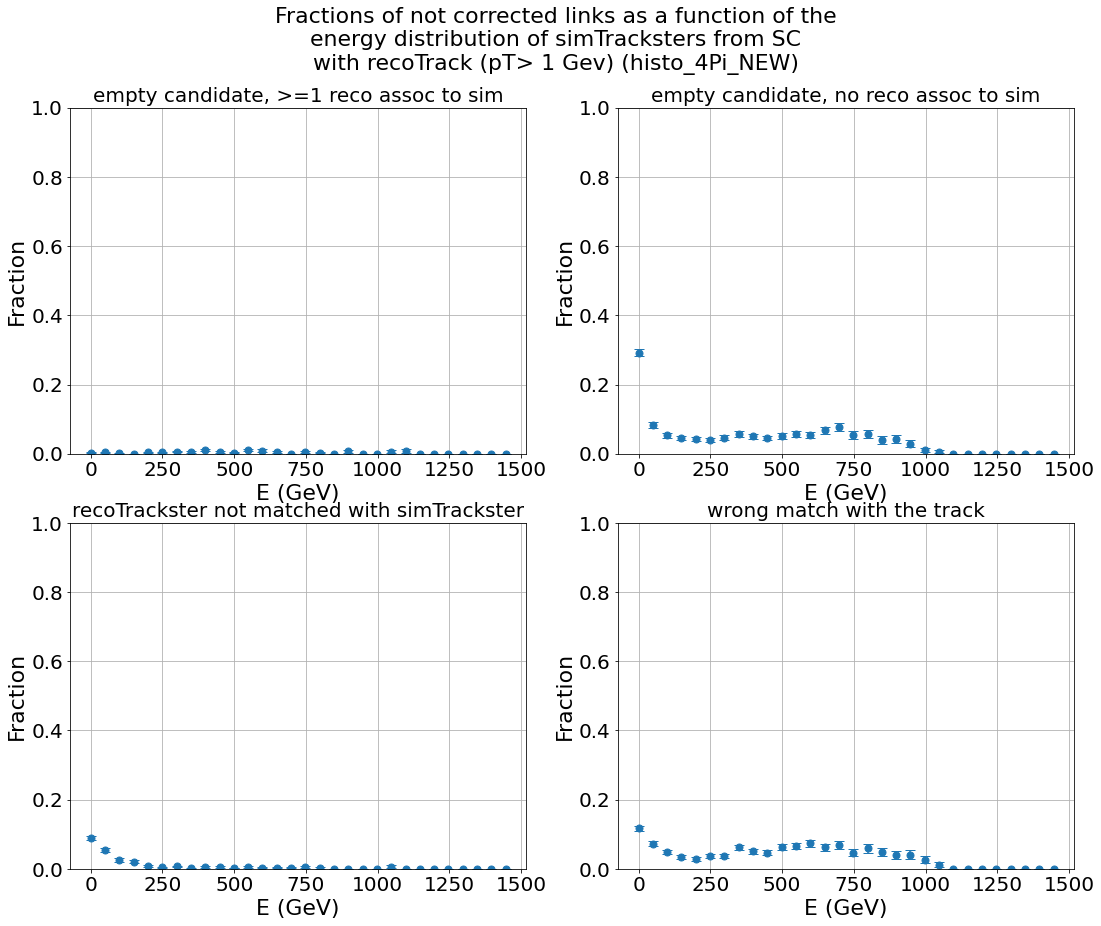

In [58]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(18,14))
#plt.hist(all_energy, label="all", color="red", alpha=0.5, bins=30, range=(min(min(all_energy), min(wrong_energy)), max(max(all_energy), max(wrong_energy))), stacked=False)
# plt.hist( label="not matched", color="orange", bins=30, range=(min(min(all_energy), min(wrong_energy)), max(max(all_energy), max(wrong_energy))), stacked=True)
# plt.hist(wrong_energy, label="wrong match", color="blue", histtype="step", bins=30, range=(min(min(all_energy), min(wrong_energy)), max(max(all_energy), max(wrong_energy))), stacked=True)

hist_0, bins = np.histogram(ok_energy+empty_but_reco_is_there+empty+reco_but_not_sim+wrong_energy, bins=30)
hist_1, _    = np.histogram(empty_but_reco_is_there, bins=bins)
hist_2, _    = np.histogram(empty, bins=bins)
hist_3, _    = np.histogram(reco_but_not_sim, bins=bins)
hist_4, _    = np.histogram(wrong_energy, bins=bins)

ax1.errorbar(bins[:-1], hist_1/hist_0, error_division(hist_1, hist_0), marker='o', markersize=7, linestyle='none', capsize=5)
ax1.set_title("empty candidate, >=1 reco assoc to sim")
ax2.errorbar(bins[:-1], hist_2/hist_0, error_division(hist_2, hist_0), marker='o', markersize=7, linestyle='none', capsize=5)
ax2.set_title("empty candidate, no reco assoc to sim")
ax3.errorbar(bins[:-1], hist_3/hist_0, error_division(hist_3, hist_0), marker='o', markersize=7, linestyle='none', capsize=5)
ax3.set_title("recoTrackster not matched with simTrackster")
ax4.errorbar(bins[:-1], hist_4/hist_0, error_division(hist_4, hist_0), marker='o', markersize=7, linestyle='none', capsize=5)
ax4.set_title("wrong match with the track")

# plt.hist([empty_but_reco_is_there, empty, reco_but_not_sim, wrong_energy],
#          label=["empty candidate but reco assoc to sim", "empty candidate", "recoTrackster not matched with simTrackster", "wrong match with the track"], 
#          color=["red","midnightblue", "yellow", "limegreen"], 
#          bins=30, 
#          range=(min(all_energy), max(all_energy)), 
#          stacked=True)

# plt.legend(fontsize=18)
plt.suptitle('Fractions of not corrected links as a function of the\nenergy distribution of simTracksters from SC\nwith recoTrack (pT> 1 Gev) ('+ name + ')', fontsize=22)

ax1.set_xlabel('E (GeV)', size=22)
ax1.set_ylabel('Fraction', size=22)
ax1.set_ylim(0,1)
ax1.grid()

ax2.set_xlabel('E (GeV)', size=22)
ax2.set_ylabel('Fraction', size=22)
ax2.set_ylim(0,1)
ax2.grid()

ax3.set_xlabel('E (GeV)', size=22)
ax3.set_ylabel('Fraction', size=22)
ax3.set_ylim(0,1)
ax3.grid()

ax4.set_xlabel('E (GeV)', size=22)
ax4.set_ylabel('Fraction', size=22)
ax4.set_ylim(0,1)
ax4.grid()

plt.show()

## compare time with time to check rejected

In [24]:
list_without_time = tracce_ok_list

import csv
  
with open('tracce_ok_list_with_time_shift.csv', 'r') as read_obj:
  
    # Return a reader object which will
    # iterate over lines in the given csvfile
    csv_reader = csv.reader(read_obj)
  
    # convert string to list
    list_using_time = list(csv_reader)

tracks_rej_idx = []
tracks_rej_pt = []
for ev, (TKtimeTmp, TKnoTime) in enumerate(zip(list_using_time, list_without_time)):
#     print(time, noTime)
    
    TKtime = np.array(TKtimeTmp, dtype=int)
    TKnoTime = np.array(TKnoTime)
    
    dif1 = np.setdiff1d(TKtime, TKnoTime) # no time compat
    if len(dif1) != 0:
        print(f"!!! for ev {ev} there are tracks linked only when time is used: {dif1}")
    dif2 = np.setdiff1d(TKnoTime, TKtime) # should be empty
    if len(dif2) != 0:
        print(f"for ev {ev} these are tracks not linked using time: {dif2}")
        for tkId in dif2:
            try:
                tracks_rej_pt.append(track_pt[ev][tkId])
            except:
                continue
    tracks_rej_idx.append(dif2)

!!! for ev 0 there are tracks linked only when time is used: [ 1  2  3  4 11 13 14 15 17 23 24]
for ev 0 these are tracks not linked using time: [0]
!!! for ev 1 there are tracks linked only when time is used: [ 2  3  7 11 12 13 14 15 16 18 19]
!!! for ev 2 there are tracks linked only when time is used: [ 2  3  4  6  8 13 15 17 18 20 22 25]
!!! for ev 3 there are tracks linked only when time is used: [ 1  2  5  6  7  9 10 11 12 13 14 15 18]
!!! for ev 4 there are tracks linked only when time is used: [ 1  2  3  4  5  7  8  9 10 11 13 14 15 17]
!!! for ev 5 there are tracks linked only when time is used: [ 1  2  7 10 14 16]
!!! for ev 6 there are tracks linked only when time is used: [ 1  2  3  4  8 11 13 14 15 17 19 20 22 23]
for ev 6 these are tracks not linked using time: [0]
!!! for ev 7 there are tracks linked only when time is used: [ 0  1  2 12 16 17 20 21 23]
!!! for ev 8 there are tracks linked only when time is used: [ 1  7  8  9 10 13 16 17 18 20 22 28 31 33 37]
!!! for ev 9

for ev 240 these are tracks not linked using time: [0]
!!! for ev 241 there are tracks linked only when time is used: [ 2  6  7 10 15 17]
!!! for ev 242 there are tracks linked only when time is used: [ 1  2  3  4  5  7 10 12 13 14 16 17]
!!! for ev 243 there are tracks linked only when time is used: [ 4  5  9 10 13 17 18]
for ev 243 these are tracks not linked using time: [0]
!!! for ev 244 there are tracks linked only when time is used: [ 0  1  3  4  5  6 12 16 17 20 21 22 23 24]
!!! for ev 245 there are tracks linked only when time is used: [ 1  2  4  7  9 13 19 20 21 23 25]
!!! for ev 246 there are tracks linked only when time is used: [ 1  2  5  7 12 14 15 16 17 18 19 23 26]
!!! for ev 247 there are tracks linked only when time is used: [ 1  3  5  6  7  8  9 10 11 13 20]
!!! for ev 248 there are tracks linked only when time is used: [ 1  4  6  7  9 10 12 13 16 17 20 27]
!!! for ev 249 there are tracks linked only when time is used: [ 4  5  6 11 12 13 18]
for ev 249 these are track

!!! for ev 512 there are tracks linked only when time is used: [ 1  3  4  9 14 15 16]
!!! for ev 513 there are tracks linked only when time is used: [ 3  6  9 11 12 13 15 17]
!!! for ev 514 there are tracks linked only when time is used: [ 1  2  3  4  5  7 11 12 13 15]
!!! for ev 515 there are tracks linked only when time is used: [ 1  2  4  6  8 13 15 16 21 23 27]
!!! for ev 516 there are tracks linked only when time is used: [ 1  6  7  8  9 11 12 13 14]
!!! for ev 517 there are tracks linked only when time is used: [ 6  7  8 14 16 17 18 19 20 21 22]
!!! for ev 518 there are tracks linked only when time is used: [ 1  4  7 10 12 15 16]
!!! for ev 519 there are tracks linked only when time is used: [ 1  2  3  4  5  7  8 10 13]
for ev 519 these are tracks not linked using time: [0]
!!! for ev 520 there are tracks linked only when time is used: [ 1  4  5  6  7  8  9 10 11 12 13 14 15 17]
for ev 520 these are tracks not linked using time: [0]
!!! for ev 521 there are tracks linked only whe

for ev 730 these are tracks not linked using time: [0]
!!! for ev 731 there are tracks linked only when time is used: [ 2  4  5  6  7 11 12 17 20 21 22 24]
!!! for ev 732 there are tracks linked only when time is used: [ 1  2  3  4  5  6  8  9 11 13 19]
!!! for ev 733 there are tracks linked only when time is used: [ 1  5  8  9 12 13 14 16 19]
for ev 733 these are tracks not linked using time: [0]
!!! for ev 734 there are tracks linked only when time is used: [ 3  8  9 11 12 14 16 19]
for ev 734 these are tracks not linked using time: [0]
!!! for ev 735 there are tracks linked only when time is used: [ 2  6  7  8  9 10 13 14]
!!! for ev 736 there are tracks linked only when time is used: [ 1  2  4  5  7  8  9 12 13 15 19]
for ev 736 these are tracks not linked using time: [0]
!!! for ev 737 there are tracks linked only when time is used: [ 3  4  5  6  7  8  9 10 12 18 21 22 25]
for ev 737 these are tracks not linked using time: [0]
!!! for ev 738 there are tracks linked only when time 

!!! for ev 947 there are tracks linked only when time is used: [ 3  6  9 12 13 14 15 16 17 25 27]
for ev 947 these are tracks not linked using time: [0]
!!! for ev 948 there are tracks linked only when time is used: [ 0  2  5  6  8  9 10 12 15 19]
!!! for ev 949 there are tracks linked only when time is used: [ 2  3  4  7  9 11 13 17 19]
for ev 949 these are tracks not linked using time: [0]
!!! for ev 950 there are tracks linked only when time is used: [ 2  5  6  8  9 10 13 16]
!!! for ev 951 there are tracks linked only when time is used: [ 1  3  4  6  7  8  9 10 11 12 13 15 18]
!!! for ev 952 there are tracks linked only when time is used: [ 1  3  4  5  6 10 11 12 13 17 25]
!!! for ev 953 there are tracks linked only when time is used: [ 1  2  3  4  6  7  8 11 17 18 22 28]
!!! for ev 954 there are tracks linked only when time is used: [ 0  1  2  4  6 10 13 14 15 18]
!!! for ev 955 there are tracks linked only when time is used: [ 2  3  4  6  7 12 14]
for ev 955 these are tracks not 

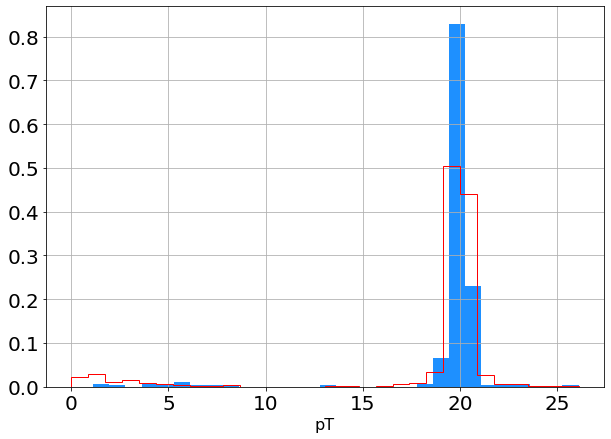

In [29]:
plt.figure(figsize=(10,7))
plt.hist(tracks_rej_pt, bins=30, color="dodgerblue", density=True)
plt.hist(ak.flatten(track_pt), bins=30, color="red", histtype="step", range=(0, max(tracks_rej_pt)), density=True)
plt.grid()
plt.xlabel("pT")
plt.show()

In [26]:
# prendo residui time tk -ts e li plotto solo per queste tracce
res = []
tracksters_time_rej = []
tracks_time_rej = []
for ev in range(len(track_in_candidate)):
    for ts, tk in enumerate(track_in_candidate[ev]):
        # ts = tracksterMerged index
        # tk = track index != pos in the collection
        # id_in_trkColl = pos in the collection
        if tk == -1 or len(tracksters_in_candidate[ev][ts])==0:
            continue # no reco track associated to trackster or empty trackster
        try:
            id_in_trkColl = np.where(track_id[ev] == tk)[0][0]
        except:
            # tsos was not valid
            continue
        if track_pt[ev][id_in_trkColl] < 1 or track_missing_outer_hits[ev][id_in_trkColl] > 5 or not track_quality[ev][id_in_trkColl]: # GeV
            continue 

        if id_in_trkColl not in tracks_rej_idx[ev]:
            continue
#         ass = recoToSim_score[ev][ts]
#         s_min = np.argmin(ass)
#         if recoToSim_score[ev][ts][s_min]>0.35:
#             continue
            
        beta = track_beta[ev][id_in_trkColl]
        mtdTime = track_time_mtd[ev][id_in_trkColl]
        mtdTimeErr = track_time_mtd_err[ev][id_in_trkColl]
        mtdPos = [track_time_mtd_x[ev][id_in_trkColl], track_time_mtd_y[ev][id_in_trkColl], track_time_mtd_z[ev][id_in_trkColl]]
        tsTime = time[ev][ts]
        tsTimeErr = timeError[ev][ts]
        tsPos = [barycenter_x[ev][ts], barycenter_y[ev][ts], barycenter_z[ev][ts]]

        if mtdTimeErr != -1 and tsTimeErr != -1:
            res.append((distance(mtdPos, tsPos)/(beta*29.9792458) - (tsTime-mtdTime)) / (np.sqrt(2) * mtdTimeErr)) #**2+tsTimeErr**2))
            tracksters_time_rej.append(tsTime)
            tracks_time_rej.append(mtdTime)
#             print(f"tsTime {tsTime}, mtdTime {mtdTime}, beta {beta}, dist {distance(mtdPos, tsPos)/(beta*29.9792458)-(tsTime-mtdTime)}, sigma {3* np.sqrt(2) * mtdTimeErr}")

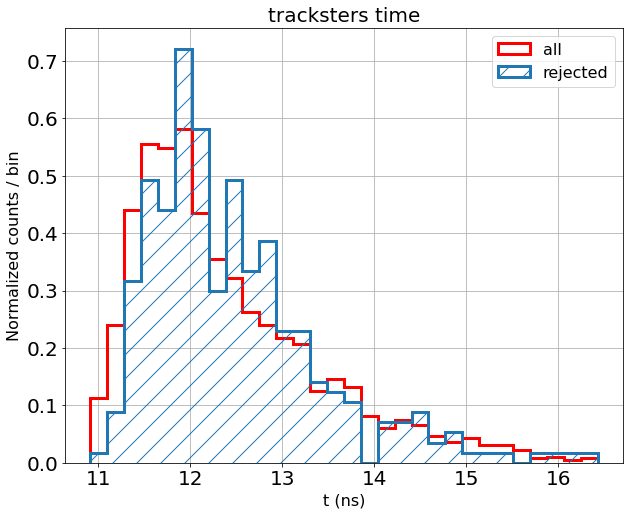

In [27]:
plt.figure(figsize=(10,8))
plt.hist(ak.flatten(time), bins=30, range=(min(tracksters_time_rej), max(tracksters_time_rej)) ,color="red", density=True, histtype="step", linewidth=3, label="all")
plt.hist(tracksters_time_rej,   bins=30, histtype="step", density=True, linewidth=3, label="rejected", hatch="/")
# plt.axvline(3, c="r")
# plt.axvline(-3, c="r")
plt.grid()
plt.title("tracksters time")
plt.xlabel("t (ns)")
plt.ylabel("Normalized counts / bin")
plt.legend()
plt.show()

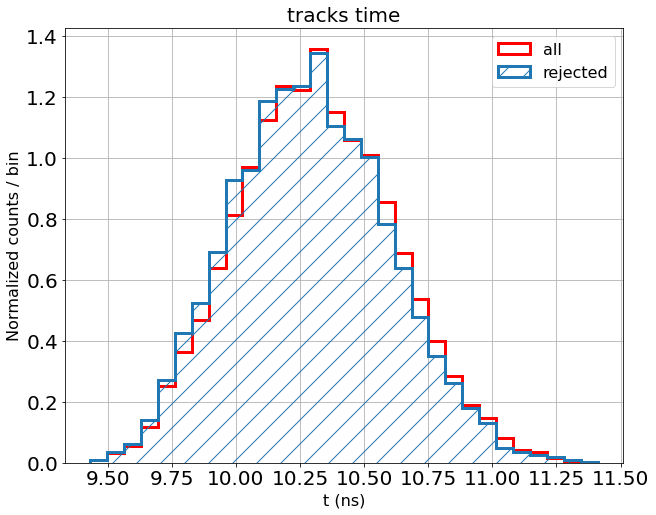

In [28]:
plt.figure(figsize=(10,8))
plt.hist(ak.flatten(track_time_mtd), bins=30, range=(min(tracks_time_rej), max(tracks_time_rej)) ,color="red", density=True, histtype="step", linewidth=3, label="all")
plt.hist(tracks_time_rej,   bins=30, histtype="step", density=True, linewidth=3, label="rejected", hatch="/")
# plt.axvline(3, c="r")
# plt.axvline(-3, c="r")
plt.grid()
plt.title("tracks time")
plt.xlabel("t (ns)")
plt.ylabel("Normalized counts / bin")
plt.legend()
plt.show()

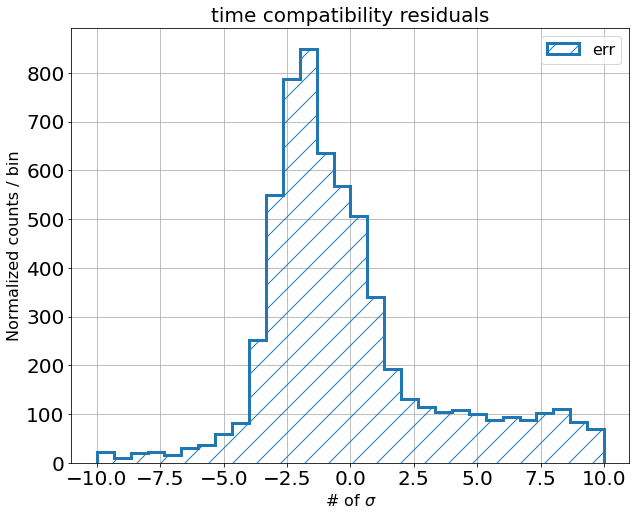

In [29]:
plt.figure(figsize=(10,8))
plt.hist(res,   bins=30, range=(-10,10), histtype="step", linewidth=3, label="err", hatch="/")
# plt.axvline(3, c="r")
# plt.axvline(-3, c="r")
plt.grid()
plt.title("time compatibility residuals")
plt.xlabel("# of $\sigma$")
plt.ylabel("Normalized counts / bin")
plt.legend()
plt.show()

### other efficiencies

In [95]:
# for ev in range(100):
#     try:
#         if ak.all(np.sort(track_in_candidate[track_in_candidate<4294967295][ev])!=np.sort(track_id[ev])) or ak.all(np.sort(SC_trackIdx[ev])!=np.sort(track_id[ev])):
#             print(track_in_candidate[track_in_candidate<4294967295][ev])
#             print(track_id[ev])
#             print(SC_trackIdx[ev])
#             print("-------")
#     except:
#         print(track_in_candidate[track_in_candidate<4294967295][ev])
#         print(track_id[ev])
#         print(SC_trackIdx[ev])
#         print("-------")    

In [22]:
# loop on tracks associated to candidates
# check if candidate is empty
ok=0
not_ok=0
for ev in range(1000): 
#     print(track_in_candidate[ev])
#     print(tracksters_in_candidate[ev])
    for s, tkIdx in enumerate(track_in_candidate[ev]):
#         print(tkIdx)
        if tkIdx == 4294967295:
            continue # no reco track associated to simTrackster
            
        cand = tracksters_in_candidate[ev][s]

        if len(cand) == 0:
            not_ok += 1
#             print("not ok")
        else:
            ok += 1
#             print("ok")

print(ok / (ok + not_ok))

0.9949795462997397


In [318]:
# check that the only LC with one hit are in the scintillator
# OK if it does not print anything

ok = 0
for ev in range(1000): 
    for s, tkIdx in enumerate(SC_trackIdx[ev]):
        indices = SC_vi[ev][s]
        if len(indices)>0:
            mask = np.where(cluster_number_of_hits[ev][indices]==1)[0]
            positions = ([pos for pos in cluster_type[ev][indices][mask] if pos!=8])
            if len(positions)>0:
                print(positions)
#             print(cluster_number_of_hits[ev][indices][mask])
#             print(cluster_layer_id[ev][indices][mask])
#             print("---")

In [18]:
# efficiency using sim to reco
# loop on STs' tracks and match to reco tkMerge using the score (0.35)
# check if at least one of the associated tkMerge is associated to the same track

ok=0
den=0
for ev in range(1000): 
    for s, tkIdx in enumerate(SC_trackIdx[ev]):
        if tkIdx == -1:
            continue # no reco track associated to simTrackster
        try:
#            print(track_id[ev], tkIdx)
            id_in_trkColl = np.where(track_id[ev] == tkIdx)[0][0]
        except:
            continue
        #print(tkIdx, track_pt[ev], track_id[ev])
        if track_pt[ev][id_in_trkColl] < 2: # GeV
            continue
        s2r_score = simToReco_score[ev][s]
        matched = False
        for i, score in enumerate(s2r_score):
            if score > 0.35:
                continue
            idx = simToReco_index[ev][s][i]
            track = track_in_candidate[ev][idx]
#             if len(tracksters_in_candidate[ev][idx])==0:
#                 continue
            if tkIdx==track:
                matched = True
                break
        den+=1
        if matched:
            ok += 1

In [19]:
eff = ok/den
print(eff)

0.3376826722338205


In [20]:
# efficiency using sim to reco
# loop on STs' tracks and match to reco tkMerge using the lowest score
# check if at least one of the associated tkMerge is associated to the same track

ok=0
den=0
for ev in range(1000): 
    for s, tkIdx in enumerate(SC_trackIdx[ev]):
        if tkIdx == -1:
            continue # no reco track associated to simTrackster
        min_score = np.argmin(simToReco_score[ev][s])
        idx = simToReco_index[ev][s][min_score]
        if len(tracksters_in_candidate[ev][idx])==0:
            continue
        track = track_in_candidate[ev][idx]
        if tkIdx==track:
            ok += 1
        den+=1

In [21]:
eff = ok/den
print(eff)

0.3638132295719844


In [22]:
# efficiency using sim to reco 
# loop on STs' tracks and match to reco tkMerge using the energy (0.3 cut)
# check if at least one of the associated tkMerge is associated to the same track

ok=0
den=0
for ev in range(1000): 
    for s, tkIdx in enumerate(SC_trackIdx[ev]):
        if tkIdx == -1 or SC_be[ev][s]==0:
            continue # no reco track associated to simTrackster
        try:
#            print(track_id[ev], tkIdx)
            id_in_trkColl = np.where(track_id[ev] == tkIdx)[0][0]
        except:
            continue
        #print(tkIdx, track_pt[ev], track_id[ev])
        if track_pt[ev][id_in_trkColl] < 2: # GeV
            continue
        s2r_en = simToReco_en[ev][s]
        matched = False
        for i, score in enumerate(s2r_en):
            score = score / SC_be[ev][s]
            if score < 0.2:
                continue
            idx = simToReco_index[ev][s][i]
            track = track_in_candidate[ev][idx]
            if len(tracksters_in_candidate[ev][idx])==0:
                continue
            if tkIdx==track:
                matched = True
                break
        den+=1
        if matched:
            ok += 1

In [23]:
eff = ok/den
print(eff)

0.3935281837160752


In [60]:
# tracksters energy

all_energy=[]
wrong_energy=[]
not_matched_energy=[]
ok_energy=[]
recoTs_no_trk_energy = []
for ev in range(1000): 
    for s, tkIdx in enumerate(SC_trackIdx[ev]):
        if tkIdx == -1:
            continue # no reco track associated to simTrackster
        try:
            id_in_trkColl = np.where(track_id[ev] == tkIdx)[0][0]
        except:
            continue
        if track_pt[ev][id_in_trkColl] < 2: # GeV
            continue
        print(f'Considering {tkIdx}')
        s2r_score = simToReco_score[ev][s]
        matched = False
        all_energy.append(SC_be[ev][s])
        if min(s2r_score)>0.35:
            not_matched_energy.append(SC_be[ev][s])
            break
        print(f'with scores {s2r_score}')
        tracks = []
        for i, score in enumerate(s2r_score):
            if score > 0.35:
                continue
            idx = simToReco_index[ev][s][i]
            track = track_in_candidate[ev][idx]
#             print(f'score: {score}, track: {track}')
            tracks.append(track)
            if tkIdx==track:
                matched = True
                break
        if not matched:
            if all(t == -1 for t in tracks):
#                 print("no match")
                recoTs_no_trk_energy.append(SC_be[ev][s])
            else:
                print("wrong match")
                wrong_energy.append(SC_be[ev][s])
        else:
#             print("correct match")
            ok_energy.append(SC_be[ev][s])
            

Considering 29


NameError: name 'simToReco_score' is not defined

In [59]:
plt.figure(figsize=(12,8))
#plt.hist(all_energy, label="all", color="red", alpha=0.5, bins=30, range=(min(min(all_energy), min(wrong_energy)), max(max(all_energy), max(wrong_energy))), stacked=False)
# plt.hist( label="not matched", color="orange", bins=30, range=(min(min(all_energy), min(wrong_energy)), max(max(all_energy), max(wrong_energy))), stacked=True)
# plt.hist(wrong_energy, label="wrong match", color="blue", histtype="step", bins=30, range=(min(min(all_energy), min(wrong_energy)), max(max(all_energy), max(wrong_energy))), stacked=True)

plt.hist([not_matched_energy, wrong_energy, recoTs_no_trk_energy, ok_energy],
         label=["simTrackster not matched with recoTrackster", "wrong match with the track", "recoTrackster without track", "correct match with the track"], 
         color=["red","yellow", "limegreen","blue"], 
         bins=30, 
         range=(min(all_energy), max(all_energy)), 
         stacked=True)

plt.grid()
plt.legend()
plt.title('SimTracksters from SC with recoTrack (pT> 2 Gev) energy')
plt.xlabel('E (GeV)', size=18)
plt.ylabel('Counts / bin', size=18)
plt.show()

NameError: name 'not_matched_energy' is not defined

<Figure size 864x576 with 0 Axes>

In [25]:
for ev in range(1000): 
    print("-----")
    print("number of tracks ", len(SC_trackIdx[ev]))
    for s, tkIdx in enumerate(SC_trackIdx[ev]):
        if tkIdx == -1:
            continue # no reco track associated to simTrackster
        print(track_boundaryX[ev][s], track_boundaryY[ev][s], track_boundaryZ[ev][s])

-----
number of tracks  2
-102.22419738769531 -45.64496994018555 322.1549987792969
92.79339599609375 67.69215393066406 -322.1549987792969
-----
number of tracks  2
18.40917205810547 -68.04955291748047 322.1549987792969
-22.557785034179688 68.51158142089844 -322.1549987792969
-----
number of tracks  20
-44.4489860534668 -44.03359603881836 -322.1549987792969
-----
number of tracks  2
85.85120391845703 -8.73867416381836 322.1549987792969
-85.41577911376953 6.306702136993408 -322.1549987792969
-----
number of tracks  2
-67.86882781982422 65.99098205566406 322.1549987792969
76.2000732421875 -58.62898635864258 -322.1549987792969
-----
number of tracks  2
-40.668617248535156 38.52006530761719 322.1549987792969
40.741207122802734 -38.19095230102539 -322.1549987792969
-----
number of tracks  2
48.589317321777344 16.947776794433594 322.1549987792969
-48.443965911865234 -17.21802520751953 -322.1549987792969
-----
number of tracks  2
11.389975547790527 -50.44463348388672 322.1549987792969
-11.8206

-26.57500648498535 42.84724426269531 322.1549987792969
26.275423049926758 -36.60352325439453 -322.1549987792969
-----
number of tracks  31
-56.58213806152344 3.247513771057129 -322.1549987792969
-----
number of tracks  2
0.16202183067798615 46.317317962646484 322.1549987792969
0.011191295459866524 -45.58561706542969 -322.1549987792969
-----
number of tracks  13
26.032745361328125 -46.16798400878906 -322.1549987792969
-----
number of tracks  16
93.29435729980469 12.25370979309082 -322.1549987792969
-----
number of tracks  2
35.54433059692383 -54.64933395385742 322.1549987792969
-37.52598571777344 57.00959014892578 -322.1549987792969
-----
number of tracks  2
-45.87727355957031 43.10878372192383 322.1549987792969
46.13288116455078 -42.973785400390625 -322.1549987792969
-----
number of tracks  2
-18.169288635253906 85.3599624633789 322.1549987792969
19.812612533569336 -88.16072845458984 -322.1549987792969
-----
number of tracks  38
33.286842346191406 30.47787857055664 322.1549987792969
32

number of tracks  2
93.61211395263672 -67.34004974365234 322.1549987792969
-97.05709838867188 67.6321792602539 -322.1549987792969
-----
number of tracks  2
-39.471519470214844 22.593032836914062 322.1549987792969
41.42047119140625 -23.58444595336914 -322.1549987792969
-----
number of tracks  80
28.997575759887695 -44.230010986328125 -322.1549987792969
-----
number of tracks  2
115.96528625488281 6.973471641540527 322.1549987792969
-119.3529052734375 -8.710192680358887 -322.1549987792969
-----
number of tracks  2
-36.94898986816406 -55.866390228271484 322.1549987792969
35.67365646362305 54.76243591308594 -322.1549987792969
-----
number of tracks  19
44.35422134399414 4.102380752563477 -322.1549987792969
-----
number of tracks  2
55.661285400390625 -85.76138305664062 322.1549987792969
-55.896942138671875 85.0331039428711 -322.1549987792969
-----
number of tracks  2
-59.68341827392578 -50.99554443359375 322.1549987792969
56.22344207763672 53.07466506958008 -322.1549987792969
-----
number 

66.0832290649414 -2.294597864151001 322.1549987792969
-----
number of tracks  2
6.459174633026123 81.4248046875 322.1549987792969
4.665194988250732 -78.47154998779297 -322.1549987792969
-----
number of tracks  44
61.10576248168945 69.69448852539062 -322.1549987792969
-61.51514434814453 -69.20783233642578 322.1549987792969
-----
number of tracks  2
-59.09196472167969 -60.55654525756836 322.1549987792969
59.85474395751953 64.2745590209961 -322.1549987792969
-----
number of tracks  49
-37.248443603515625 -61.299354553222656 -322.1549987792969
-----
number of tracks  34
64.74532318115234 -4.573252201080322 322.1549987792969
-----
number of tracks  37
43.72776412963867 -36.83424758911133 322.1549987792969
-----
number of tracks  35
-56.73816680908203 -28.2311954498291 322.1549987792969
-----
number of tracks  44
-63.19349670410156 -5.655401706695557 322.1549987792969
-----
number of tracks  2
57.445472717285156 42.570865631103516 322.1549987792969
-57.86928939819336 -43.30414962768555 -322.

number of tracks  2
-107.04268646240234 -13.38301944732666 322.1549987792969
105.64751434326172 15.371356010437012 -322.1549987792969
-----
number of tracks  2
-32.54457473754883 57.282127380371094 322.1549987792969
36.43609619140625 -56.97989273071289 -322.1549987792969
-----
number of tracks  2
44.562408447265625 -34.37501907348633 322.1549987792969
-44.88212585449219 32.12711715698242 -322.1549987792969
-----
number of tracks  2
-87.23091125488281 -53.31260299682617 322.1549987792969
83.52399444580078 51.9168701171875 -322.1549987792969
-----
number of tracks  2
-17.183921813964844 61.56782150268555 322.1549987792969
18.46434211730957 -64.3778305053711 -322.1549987792969
-----
number of tracks  2
16.421415328979492 92.48983001708984 322.1549987792969
-14.3043212890625 -91.66165924072266 -322.1549987792969
-----
number of tracks  81
35.857791900634766 -13.271785736083984 -322.1549987792969
61.79338836669922 -17.96067237854004 -322.1549987792969
49.97309875488281 43.4672737121582 -322

-42.179256439208984 110.7443618774414 -322.1549987792969
-----
number of tracks  28
-53.832733154296875 11.514791488647461 322.1549987792969
-----
number of tracks  2
-65.82024383544922 -46.22879409790039 322.1549987792969
67.29938507080078 48.864356994628906 -322.1549987792969
-----
number of tracks  2
36.07695007324219 88.17485046386719 322.1549987792969
-31.224088668823242 -90.3121109008789 -322.1549987792969
-----
number of tracks  2
-51.0607795715332 23.983104705810547 322.1549987792969
50.90629196166992 -23.64006805419922 -322.1549987792969
-----
number of tracks  2
66.26102447509766 -80.17555236816406 322.1549987792969
-65.4417953491211 78.06427001953125 -322.1549987792969
-----
number of tracks  69
30.571701049804688 -102.87857055664062 322.1549987792969
-----
number of tracks  2
-74.17820739746094 2.9439826011657715 322.1549987792969
72.88663482666016 -2.072084426879883 -322.1549987792969
-----
number of tracks  2
40.44887161254883 63.49010467529297 322.1549987792969
-40.08093

number of tracks  2
-64.80648040771484 -87.05164337158203 322.1549987792969
64.33470916748047 87.89446258544922 -322.1549987792969
-----
number of tracks  83
32.276451110839844 -41.192134857177734 -322.1549987792969
28.93378448486328 -43.55305862426758 -322.1549987792969
33.68592834472656 -59.723487854003906 -322.1549987792969
32.86296463012695 -41.69658660888672 -322.1549987792969
35.22412872314453 -36.10992431640625 -322.1549987792969
27.18384552001953 -46.888511657714844 -322.1549987792969
61.15253448486328 -18.604982376098633 -322.1549987792969
31.51540756225586 -43.14911651611328 -322.1549987792969
28.351423263549805 -41.95635223388672 -322.1549987792969
-29.554153442382812 39.92750549316406 322.1549987792969
-----
number of tracks  13
17.13275146484375 57.86297607421875 -322.1549987792969
-----
number of tracks  2
81.96597290039062 -50.51167297363281 322.1549987792969
-79.48172760009766 48.31771469116211 -322.1549987792969
-----
number of tracks  55
43.31056594848633 -7.089845180

29.695934295654297 -97.83487701416016 322.1549987792969
-31.11903190612793 98.77690887451172 -322.1549987792969
-----
number of tracks  2
40.737918853759766 55.64063262939453 322.1549987792969
-40.683319091796875 -56.034873962402344 -322.1549987792969
-----
number of tracks  2
87.04270935058594 10.424424171447754 322.1549987792969
-82.67214965820312 -10.360685348510742 -322.1549987792969
-----
number of tracks  2
-11.907574653625488 43.02281188964844 322.1549987792969
12.367290496826172 -43.825164794921875 -322.1549987792969
-----
number of tracks  2
40.445518493652344 -97.49485778808594 -322.1549987792969
-37.69412612915039 93.58806610107422 322.1549987792969
-----
number of tracks  2
-65.87033081054688 -75.62599182128906 322.1549987792969
63.27117156982422 73.80988311767578 -322.1549987792969
-----
number of tracks  2
72.8710708618164 60.82997131347656 322.1549987792969
-69.80980682373047 -60.03642272949219 -322.1549987792969
-----
number of tracks  2
6.726264476776123 73.87557220458

-46.29717254638672 19.003345489501953 322.1549987792969
-40.639915466308594 22.4342098236084 322.1549987792969
-43.49999237060547 19.74909782409668 322.1549987792969
-56.91693115234375 -4.62208890914917 322.1549987792969
41.829254150390625 -19.655452728271484 -322.1549987792969
-----
number of tracks  2
55.52388381958008 11.9027099609375 322.1549987792969
-54.81040573120117 -13.339010238647461 -322.1549987792969
-----
number of tracks  2
54.74111557006836 -28.474077224731445 322.1549987792969
-55.05809783935547 28.384458541870117 -322.1549987792969
-----
number of tracks  45
-112.50630187988281 15.902985572814941 -322.1549987792969
-----
number of tracks  2
77.52949523925781 44.797176361083984 322.1549987792969
-76.07459259033203 -44.95661926269531 -322.1549987792969
-----
number of tracks  2
-53.29073715209961 38.76169204711914 322.1549987792969
56.49491500854492 -35.72050857543945 -322.1549987792969
-----
number of tracks  132
36.00822067260742 42.30923843383789 -322.1549987792969
-3

61.640342712402344 10.59898853302002 -322.1549987792969
39.96129608154297 6.414144039154053 -322.1549987792969
47.5056037902832 -0.9857179522514343 -322.1549987792969
44.308799743652344 -2.8658947944641113 -322.1549987792969
28.446481704711914 11.32363510131836 -322.1549987792969
40.92531967163086 4.652178764343262 -322.1549987792969
45.37385177612305 -2.048295259475708 -322.1549987792969
-43.912452697753906 1.3600776195526123 322.1549987792969
-----
number of tracks  2
47.767215728759766 29.548866271972656 322.1549987792969
-48.392303466796875 -30.79698371887207 -322.1549987792969
-----
number of tracks  2
-18.482494354248047 -107.7065200805664 322.1549987792969
18.131839752197266 114.4773178100586 -322.1549987792969
-----
number of tracks  2
-12.745113372802734 -46.76985549926758 322.1549987792969
12.450400352478027 46.91703414916992 -322.1549987792969
-----
number of tracks  75
-35.29356002807617 -25.35548210144043 322.1549987792969
-999.0 -999.0 -999.0
3.861631155014038 -38.0882034

-62.21689224243164 -33.82558822631836 -322.1549987792969
-----
number of tracks  2
-29.733278274536133 -35.63493728637695 -322.1549987792969
31.092731475830078 36.40609359741211 322.1549987792969
-----
number of tracks  2
48.76262283325195 -52.11573791503906 322.1549987792969
-50.36354064941406 52.535614013671875 -322.1549987792969
-----
number of tracks  2
36.93974685668945 38.632381439208984 322.1549987792969
-37.80708694458008 -39.847286224365234 -322.1549987792969
-----
number of tracks  52
-35.9832649230957 -29.685205459594727 322.1549987792969
-----
number of tracks  2
83.0114974975586 53.71590805053711 322.1549987792969
-83.53827667236328 -54.721858978271484 -322.1549987792969
-----
number of tracks  27
-48.62275314331055 104.99661254882812 322.1549987792969
40.30281448364258 92.11921691894531 322.1549987792969
-28.92630386352539 116.81028747558594 322.1549987792969
-37.54802322387695 110.3830795288086 322.1549987792969
-56.834922790527344 94.3546142578125 322.1549987792969
46.9

-1.2557405233383179 54.704010009765625 -322.1549987792969
-----
number of tracks  40
86.88777923583984 -13.406460762023926 322.1549987792969
-----
number of tracks  80
73.71295928955078 75.12489318847656 322.1549987792969
-----
number of tracks  2
0.8532448410987854 70.5984115600586 322.1549987792969
-0.41448044776916504 -70.37651062011719 -322.1549987792969
-----
number of tracks  2
77.39945983886719 -36.38214111328125 322.1549987792969
-82.01370239257812 37.94953155517578 -322.1549987792969
-----
number of tracks  2
-87.56800842285156 34.98312759399414 322.1549987792969
86.91828918457031 -33.6804313659668 -322.1549987792969
-----
number of tracks  2
90.61669921875 14.339024543762207 322.1549987792969
-90.64268493652344 -18.824378967285156 -322.1549987792969
-----
number of tracks  2
-81.84878540039062 -17.884302139282227 -322.1549987792969
81.9312515258789 16.886165618896484 322.1549987792969
-----
number of tracks  43
-52.705650329589844 70.35954284667969 322.1549987792969
-----
num

58.55463409423828 -15.712157249450684 -322.1549987792969
-----
number of tracks  2
-4.700799942016602 59.06404113769531 322.1549987792969
9.01140308380127 -61.217254638671875 -322.1549987792969
-----
number of tracks  27
-77.58103942871094 -63.34589767456055 322.1549987792969
-----
number of tracks  2
43.63213348388672 -94.64221954345703 322.1549987792969
-45.05009841918945 95.62936401367188 -322.1549987792969
-----
number of tracks  2
4.311556816101074 48.19158935546875 322.1549987792969
-3.992107391357422 -46.15842056274414 -322.1549987792969
-----
number of tracks  2
-42.301937103271484 -40.42181396484375 322.1549987792969
44.41923904418945 42.99116516113281 -322.1549987792969
-----
number of tracks  13
54.12955856323242 -49.504310607910156 322.1549987792969
53.80503463745117 -53.36396789550781 322.1549987792969
-53.90798568725586 50.68289566040039 -322.1549987792969
-----
number of tracks  2
-19.285202026367188 -43.896060943603516 322.1549987792969
18.439252853393555 42.54639816284

107.49220275878906 -30.871923446655273 322.1549987792969
-112.26219940185547 30.902381896972656 -322.1549987792969
-----
number of tracks  2
40.99922561645508 -36.845420837402344 -322.1549987792969
-42.847259521484375 39.13077926635742 322.1549987792969
-----
number of tracks  2
64.26520538330078 -48.94300079345703 322.1549987792969
-64.81977081298828 48.39435958862305 -322.1549987792969
-----
number of tracks  2
-65.51090240478516 80.22345733642578 322.1549987792969
65.00133514404297 -77.5617446899414 -322.1549987792969
-----
number of tracks  2
25.641613006591797 -52.48640060424805 322.1549987792969
-26.335086822509766 51.79825210571289 -322.1549987792969
-----
number of tracks  2
19.513381958007812 48.73676681518555 322.1549987792969
-19.229169845581055 -50.554683685302734 -322.1549987792969
-----
number of tracks  2
49.3740119934082 25.910661697387695 322.1549987792969
-48.70133972167969 -25.75052833557129 -322.1549987792969
-----
number of tracks  31
16.573448181152344 62.49705123

## plots

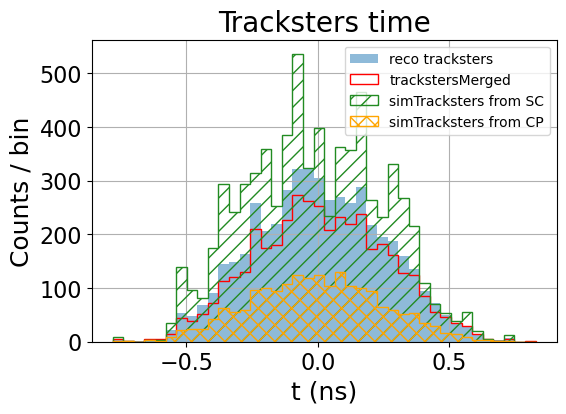

In [41]:
plt.figure(dpi=100)
rmin = min(ak.min(tracksters_CALO_time[tracksters_CALO_time>-99]), ak.min(trackstersMerged_CALO_time[trackstersMerged_CALO_time>-99]))
rmax = max(ak.max(tracksters_CALO_time[tracksters_CALO_time>-99]), ak.max(trackstersMerged_CALO_time[trackstersMerged_CALO_time>-99]))
plt.hist(ak.flatten(tracksters_CALO_time[tracksters_CALO_time>-99]), bins=40, alpha=.5, label="reco tracksters", range=(rmin,rmax))
plt.hist(ak.flatten(trackstersMerged_CALO_time[trackstersMerged_CALO_time>-99]), bins=40, color="red", histtype="step", label="trackstersMerged", range=(rmin,rmax))
plt.hist(ak.flatten(SC_CALO_time[SC_CALO_time>-99]), bins=40, color="forestgreen", histtype="step", label="simTracksters from SC", range=(rmin,rmax), hatch="//")
plt.hist(ak.flatten(CP_CALO_time[CP_CALO_time>-99]), bins=40, color="orange", histtype="step", label="simTracksters from CP", range=(rmin,rmax), hatch="XX")
plt.grid()
plt.legend()
plt.title('Tracksters time')
plt.xlabel('t (ns)', size=18)
plt.ylabel('Counts / bin', size=18)
plt.show()

In [223]:
massimo = max(ak.count(track_id, axis=1))
nphist(ak.count(track_id, axis=1), bins=massimo+1, title="number of tracks", xlabel="# tracks")

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [102]:
# #TODO
# -keep/remove link tk-trk based on time compatibility
# -create new link tk-trk based on mtd

## compare time with no time

In [34]:
no_time_empty_but_reco_is_there = np.loadtxt("4Pi_close_noTime_empty_but_reco_is_there.txt")
no_time_empty                   = np.loadtxt("4Pi_close_noTime_empty.txt")
no_time_reco_but_not_sim        = np.loadtxt("4Pi_close_noTime_reco_but_not_sim.txt")
no_time_wrong_energy            = np.loadtxt("4Pi_close_noTime_wrong_energy.txt")
no_time_ok_energy               = np.loadtxt("4Pi_close_noTime_ok_energy.txt")

In [35]:
si_time_empty_but_reco_is_there = np.loadtxt("4Pi_close_NEW2_empty_but_reco_is_there.txt")
si_time_empty                   = np.loadtxt("4Pi_close_NEW2_empty.txt")
si_time_reco_but_not_sim        = np.loadtxt("4Pi_close_NEW2_reco_but_not_sim.txt")
si_time_wrong_energy            = np.loadtxt("4Pi_close_NEW2_wrong_energy.txt")
si_time_ok_energy               = np.loadtxt("4Pi_close_NEW2_ok_energy.txt")

In [36]:
release_empty_but_reco_is_there = np.loadtxt("4Pi_close_release_empty_but_reco_is_there.txt")
release_empty                   = np.loadtxt("4Pi_close_release_empty.txt")
release_reco_but_not_sim        = np.loadtxt("4Pi_close_release_reco_but_not_sim.txt")
release_wrong_energy            = np.loadtxt("4Pi_close_release_wrong_energy.txt")
release_ok_energy               = np.loadtxt("4Pi_close_release_ok_energy.txt")

In [37]:
def error_division(num, den):
    return num/den * np.sqrt((np.sqrt(num) / num)**2 + (np.sqrt(den)/den)**2)
    #return num/den * (1/(num+1) + 1/(den+1))**0.5

/tmp/ipykernel_664/1355676479.py:27: RuntimeWarning: invalid value encountered in divide
  plt.errorbar(bin_centers, hist1/no_time_hist_0, error_division(hist1, no_time_hist_0), label="without using time compatibility", color="red",        marker='o', markersize=7, linestyle='none', capsize=5)
/tmp/ipykernel_664/2849949112.py:2: RuntimeWarning: invalid value encountered in divide
  return num/den * np.sqrt((np.sqrt(num) / num)**2 + (np.sqrt(den)/den)**2)
/tmp/ipykernel_664/1355676479.py:28: RuntimeWarning: invalid value encountered in divide
  plt.errorbar(bin_centers, hist2/si_time_hist_0, error_division(hist2, si_time_hist_0), label="using time compatibility",         color="dodgerblue", marker='o', markersize=7, linestyle='none', capsize=5)
/tmp/ipykernel_664/1355676479.py:29: RuntimeWarning: invalid value encountered in divide
  plt.errorbar(bin_centers, hist3/release_hist_0, error_division(hist3, release_hist_0), label="release",                          color="black",      marker

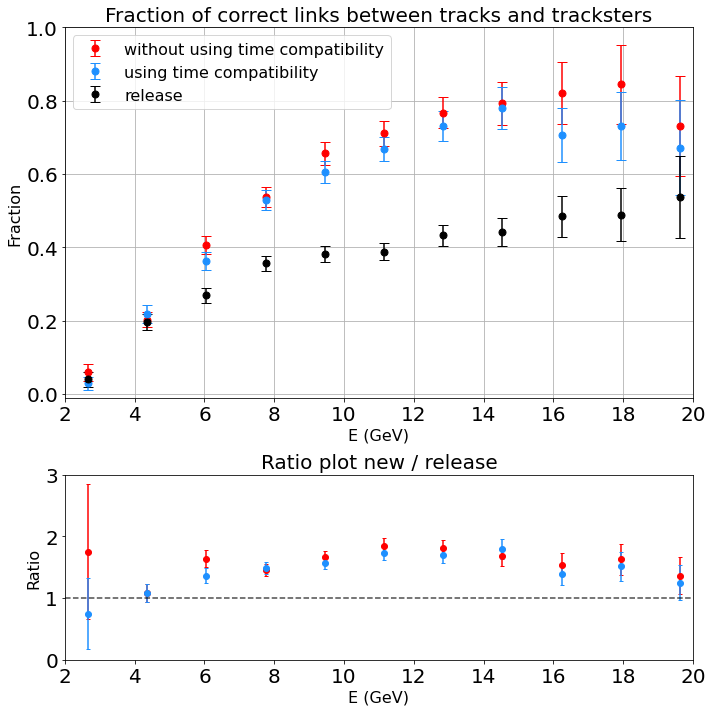

In [38]:
from matplotlib.gridspec import GridSpec

# Sample data
no_time_data = no_time_ok_energy
si_time_data = si_time_ok_energy

# Create histograms with errors
si_time_hist_0, bins = np.histogram(list(si_time_ok_energy)+list(si_time_empty_but_reco_is_there)+list(si_time_empty)+list(si_time_reco_but_not_sim)+list(si_time_wrong_energy), bins=30)
no_time_hist_0, _ = np.histogram(list(no_time_ok_energy)+list(no_time_empty_but_reco_is_there)+list(no_time_empty)+list(no_time_reco_but_not_sim)+list(no_time_wrong_energy), bins=bins)
release_hist_0, _ = np.histogram(list(release_ok_energy)+list(release_empty_but_reco_is_there)+list(release_empty)+list(release_reco_but_not_sim)+list(release_wrong_energy), bins=bins)
hist1, _ = np.histogram(no_time_data, bins=bins)
hist2, _ = np.histogram(si_time_data, bins=bins)
hist3, _ = np.histogram(release_ok_energy, bins=bins)
bin_centers = 0.5 * (bins[1:] + bins[:-1])

# Calculate histogram errors (assuming Poisson errors)
errors1 = np.sqrt(hist1)
errors2 = np.sqrt(hist2)
errors3 = np.sqrt(hist3)

# Create the main plot
plt.figure(figsize=(10, 10))

gs = GridSpec(2, 1, height_ratios=[2, 1])

plt.subplot(gs[0])
plt.errorbar(bin_centers, hist1/no_time_hist_0, error_division(hist1, no_time_hist_0), label="without using time compatibility", color="red",        marker='o', markersize=7, linestyle='none', capsize=5)
plt.errorbar(bin_centers, hist2/si_time_hist_0, error_division(hist2, si_time_hist_0), label="using time compatibility",         color="dodgerblue", marker='o', markersize=7, linestyle='none', capsize=5)
plt.errorbar(bin_centers, hist3/release_hist_0, error_division(hist3, release_hist_0), label="release",                          color="black",      marker='o', markersize=7, linestyle='none', capsize=5)
plt.legend()
plt.xlim(2,20)
plt.ylim(-0.01,1)
plt.grid()
plt.xlabel('E (GeV)')
plt.ylabel('Fraction')
plt.title('Fraction of correct links between tracks and tracksters')

# Create the ratio plot
plt.subplot(gs[1])
ratio = hist1 / hist3
ratio_errors = ratio * np.sqrt((errors1 / hist1)**2 + (errors3 / hist3)**2)
plt.errorbar(bin_centers, ratio, yerr=ratio_errors, fmt='o', color='red', capsize=2)

ratio = hist2 / hist3
ratio_errors = ratio * np.sqrt((errors2 / hist2)**2 + (errors3 / hist3)**2)
plt.errorbar(bin_centers, ratio, yerr=ratio_errors, fmt='o', color='dodgerblue', capsize=2)

plt.axhline(y=1, color='black', linestyle='--', alpha=0.7)
plt.xlabel('E (GeV)')
plt.ylabel('Ratio')
plt.ylim(0,3)
plt.xlim(2,20)
plt.title('Ratio plot new / release')
plt.tight_layout()

# Show the plots
plt.show()


/tmp/ipykernel_664/197812411.py:25: RuntimeWarning: invalid value encountered in divide
  plt.errorbar(bin_centers, hist1/no_time_hist_0, error_division(hist1, no_time_hist_0), label="without using time compatibility", color="red",        marker='o', markersize=7, linestyle='none', capsize=5)
/tmp/ipykernel_664/2849949112.py:2: RuntimeWarning: invalid value encountered in divide
  return num/den * np.sqrt((np.sqrt(num) / num)**2 + (np.sqrt(den)/den)**2)
/tmp/ipykernel_664/197812411.py:26: RuntimeWarning: invalid value encountered in divide
  plt.errorbar(bin_centers, hist2/si_time_hist_0, error_division(hist2, si_time_hist_0), label="using time compatibility",         color="dodgerblue", marker='o', markersize=7, linestyle='none', capsize=5)
/tmp/ipykernel_664/197812411.py:27: RuntimeWarning: invalid value encountered in divide
  plt.errorbar(bin_centers, hist3/release_hist_0, error_division(hist3, release_hist_0), label="release",                          color="black",      marker='o

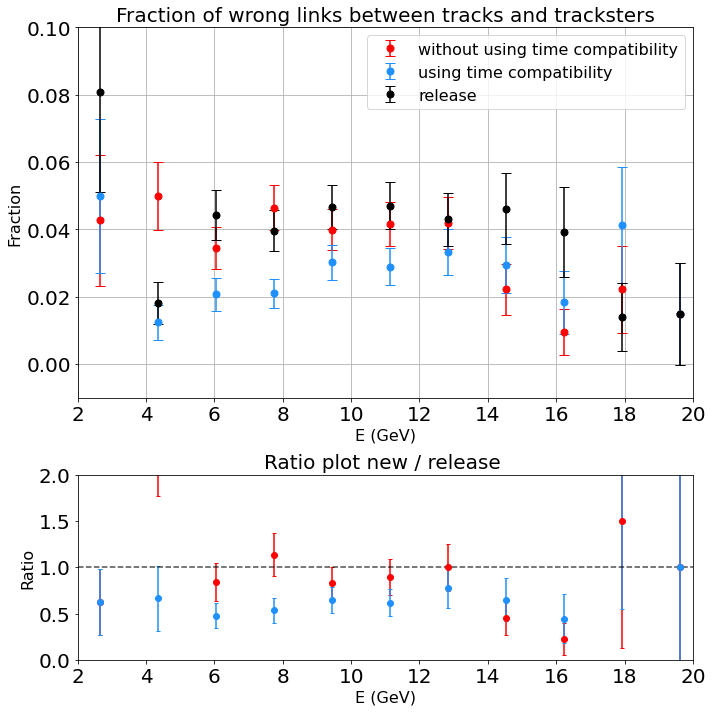

In [39]:
# Sample data
no_time_data = no_time_wrong_energy
si_time_data = si_time_wrong_energy

# Create histograms with errors
si_time_hist_0, bins = np.histogram(list(si_time_ok_energy)+list(si_time_empty_but_reco_is_there)+list(si_time_empty)+list(si_time_reco_but_not_sim)+list(si_time_wrong_energy), bins=30)
no_time_hist_0, _ = np.histogram(list(no_time_ok_energy)+list(no_time_empty_but_reco_is_there)+list(no_time_empty)+list(no_time_reco_but_not_sim)+list(no_time_wrong_energy), bins=bins)
release_hist_0, _ = np.histogram(list(release_ok_energy)+list(release_empty_but_reco_is_there)+list(release_empty)+list(release_reco_but_not_sim)+list(release_wrong_energy), bins=bins)
hist1, _ = np.histogram(no_time_data, bins=bins)
hist2, _ = np.histogram(si_time_data, bins=bins)
hist3, _ = np.histogram(release_wrong_energy, bins=bins)
bin_centers = 0.5 * (bins[1:] + bins[:-1])

# Calculate histogram errors (assuming Poisson errors)
errors1 = np.sqrt(hist1)
errors2 = np.sqrt(hist2)
errors3 = np.sqrt(hist3)

# Create the main plot
plt.figure(figsize=(10, 10))

gs = GridSpec(2, 1, height_ratios=[2, 1])

plt.subplot(gs[0])
plt.errorbar(bin_centers, hist1/no_time_hist_0, error_division(hist1, no_time_hist_0), label="without using time compatibility", color="red",        marker='o', markersize=7, linestyle='none', capsize=5)
plt.errorbar(bin_centers, hist2/si_time_hist_0, error_division(hist2, si_time_hist_0), label="using time compatibility",         color="dodgerblue", marker='o', markersize=7, linestyle='none', capsize=5)
plt.errorbar(bin_centers, hist3/release_hist_0, error_division(hist3, release_hist_0), label="release",                          color="black",      marker='o', markersize=7, linestyle='none', capsize=5)
plt.legend()
plt.xlim(2,20)
plt.ylim(-0.01,0.1)
plt.grid()
plt.xlabel('E (GeV)')
plt.ylabel('Fraction')
plt.title('Fraction of wrong links between tracks and tracksters')

# Create the ratio plot
plt.subplot(gs[1])
ratio = hist1 / hist3
ratio_errors = ratio * np.sqrt((errors1 / hist1)**2 + (errors3 / hist3)**2)
plt.errorbar(bin_centers, ratio, yerr=ratio_errors, fmt='o', color='red', capsize=2)

ratio = hist2 / hist3
ratio_errors = ratio * np.sqrt((errors2 / hist2)**2 + (errors3 / hist3)**2)
plt.errorbar(bin_centers, ratio, yerr=ratio_errors, fmt='o', color='dodgerblue', capsize=2)

plt.axhline(y=1, color='black', linestyle='--', alpha=0.7)
plt.xlabel('E (GeV)')
plt.ylabel('Ratio')
plt.ylim(0,2)
plt.xlim(2,20)
plt.title('Ratio plot new / release ')
plt.tight_layout()

# Show the plots
plt.show()
